## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [2]:
!pip3 install --upgrade pip

    100% |████████████████████████████████| 1.5MB 5.6MB/s eta 0:00:01    40% |█████████████                   | 624kB 9.9MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [3]:
!pip install imblearn

     |████████████████████████████████| 206 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 10.2 MB/s eta 0:00:01   |███████▋                        | 3.5 MB 9.4 MB/s eta 0:00:02     |█████████████▍                  | 6.2 MB 9.4 MB/s eta 0:00:01     |██████████████████▎             | 8.5 MB 9.4 MB/s eta 0:00:01     |███████████████████▋            | 9.1 MB 9.4 MB/s eta 0:00:01     |██████████████████████████▉     | 12.5 MB 10.2 MB/s eta 0:00:01     |██████████████████████████████▍ | 14.1 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 9.1 MB/s eta 0:00:01     |█████                           | 3.5 MB 11.7 MB/s eta 0:00:02     |█████▊                          | 4.0 MB 11.7 MB/s eta 0:00:02     |██████▍                         | 4.5 MB 11.7 MB/s eta 0:00:02     |███████▏                        | 5.0 MB 11.7 MB/s eta 0:00:02     |███████▉                        | 5.5 MB 11.7 MB/s eta 0:00:02     |█████████▋                      | 6.7 MB 11.

In [4]:
!pip install catboost

     |████████████████████████████████| 67.3 MB 21 kB/s s eta 0:00:01   |▎                               | 665 kB 5.0 MB/s eta 0:00:14     |▋                               | 1.2 MB 5.0 MB/s eta 0:00:14     |▉                               | 1.8 MB 5.0 MB/s eta 0:00:14     |██▎                             | 4.8 MB 5.0 MB/s eta 0:00:13     |██▊                             | 5.7 MB 5.0 MB/s eta 0:00:13     |███▏                            | 6.6 MB 5.0 MB/s eta 0:00:13     |████▊                           | 9.9 MB 5.0 MB/s eta 0:00:12     |█████                           | 10.7 MB 5.0 MB/s eta 0:00:12     |█████▊                          | 11.9 MB 5.0 MB/s eta 0:00:12     |███████▏                        | 15.1 MB 5.0 MB/s eta 0:00:11     |███████▊                        | 16.3 MB 5.0 MB/s eta 0:00:11     |████████████                    | 25.4 MB 26.3 MB/s eta 0:00:02     |██████████████▍                 | 30.3 MB 26.3 MB/s eta 0:00:02     |██████████████▊                 | 31.0 MB 26.3 M

In [9]:
!pip3 install tensorflow

     |████████████████████████████████| 1.6 MB 4.7 MB/s eta 0:00:01     |███████████████████████████████▏| 1.6 MB 4.7 MB/s eta 0:00:01


In [10]:
from catboost import CatBoostClassifier

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier


In [72]:
# load in packages
from itertools import combinations
from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [ ]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need

In [3]:
# count how many data we have for received and not received promotion
train_data.Promotion.value_counts()

Yes    42364
No     42170
Name: Promotion, dtype: int64

In [4]:
# we need to get the porcentage of each category and also observe if exist difference between their mean

Yes_Promo_mean = ((train_data.Promotion == "Yes").sum())/train_data.shape[0]
Non_Promo_mean = (train_data.Promotion == "No").sum()/train_data.shape[0]
difference = Yes_Promo_mean - Non_Promo_mean
print("Yes Promotion mean : {}." .format(Yes_Promo_mean))
print("Non Promotion average : {}." .format(Non_Promo_mean))
print("Difference : {}." .format(difference))


Yes Promotion mean : 0.5011474672912675.
Non Promotion average : 0.4988525327087326.
Difference : 0.00229493458253488.


In [15]:
# to consider data out of our dataset and test the result, we gonna test the bootstrap method on the difference


difference_boot = []
for _ in range(1000):
    bootstrap = train_data.sample(3000, replace=True)
    Yes_Promo_mean = ((bootstrap.Promotion == "Yes").sum())/bootstrap.shape[0]
    Non_Promo_mean = (bootstrap.Promotion == "No").sum()/bootstrap.shape[0]
    difference_boot.append(Yes_Promo_mean - Non_Promo_mean)

Understanding if we can use the p-value to calculate the difference, our difference samples distribution need to be normal.
Let's Check

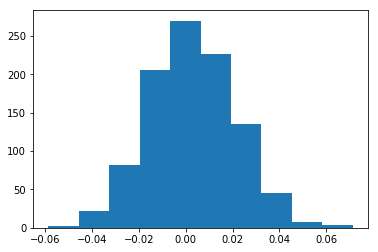

In [16]:
plt.hist(difference_boot);

Now, we're gonna make our difference bootstrap sample normal


In [17]:
get_normal_diff = np.random.normal(0, np.std(difference_boot), 1000)


In [18]:
# Significance of our result

p_val = (difference_boot>get_normal_diff).mean()
p_val


0.56399999999999995

As the value as greater than 0.05, we're gonna accept the null hypothesis and the samples have no significant difference mean

Let's calculate NIR

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$


In [21]:
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
cust_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
NIR = (10*purchase_treatment - 0.15*cust_treatment)-10*purchase_control
NIR

-2334.5999999999995

 Let's Take a look of boostrap NIR

In [22]:
NIRs = []
for _ in range(10000):
    bootsample = train_data.sample(30000, replace=True)
    purchase_treatment = bootsample[bootsample['Promotion'] == "Yes"].purchase.sum()
    cust_treatment = bootsample[bootsample['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample[bootsample['Promotion'] == "No"].purchase.sum()
    NIRs.append((10*purchase_treatment - 0.15*cust_treatment)-10*purchase_control)

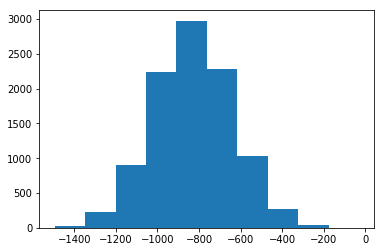

In [23]:
plt.hist(NIRs);

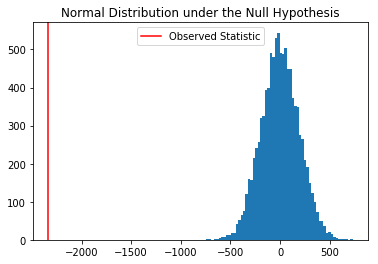

In [25]:

plt.axvline(NIR, color='r', label ="Observed Statistic")
null_NIRs = np.random.normal(0, np.std(NIRs), 10000)
plt.hist(null_NIRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [26]:
pval = (NIR>null_NIRs).mean()
pval

0.0

We fail to reject null hypothesis.there is no statistically signifcant increase in NIR (Metric that we wanted to optimize)

Let's calculate IRR

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


In [28]:
purchase_treatment = train_data[train_data['Promotion'] == "Yes"].purchase.sum()
cust_treatment = train_data[train_data['Promotion'] == "Yes"].shape[0]
purchase_control = train_data[train_data['Promotion'] == "No"].purchase.sum()
cust_control = train_data[train_data['Promotion'] == "No"].shape[0]

IRR = (purchase_treatment/cust_treatment)-(purchase_control/cust_control)
IRR

0.0094545478197727018

In [30]:
IRRs = []
for _ in range(10000):
    bootsample = train_data.sample(30000, replace=True)
    purchase_treatment = bootsample[bootsample['Promotion'] == "Yes"].purchase.sum()
    cust_treatment = bootsample[bootsample['Promotion'] == "Yes"].shape[0]
    purchase_control = bootsample[bootsample['Promotion'] == "No"].purchase.sum()
    IRRs.append((purchase_treatment/cust_treatment)-(purchase_control/cust_control))

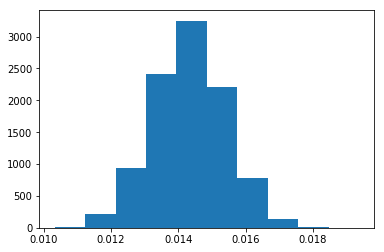

In [45]:
plt.hist(IRRs);

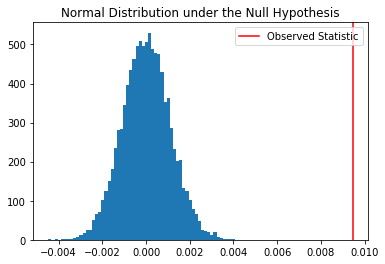

In [32]:
plt.axvline(IRR, color='r', label ="Observed Statistic")
null_IRRs = np.random.normal(0, np.std(IRRs), 10000)
plt.hist(null_IRRs, bins=60)
plt.title("Normal Distribution under the Null Hypothesis")
plt.legend();

In [33]:

pval_IRR = (IRR>null_IRRs).mean()
pval_IRR

1.0

we reject the null hypothesis. So using a promo has some effect for the costumers that get the promo

# Model

In [47]:
# Make a model using only data from people who receive the promo to get if the costumer will or will not purchase

In [48]:
# id and promo columns are irrelevant to our model, since promo will be only yes and id doens't inflluence the target

In [48]:
df = train_data[train_data['Promotion']=="Yes"]


In [49]:
df.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2
8,15,Yes,0,2,31.930423,0.393317,2,3,1,2
10,17,Yes,0,1,32.770916,-1.511395,2,1,4,1
12,20,Yes,0,1,36.957009,0.133583,2,3,1,1
14,22,Yes,0,3,36.911714,-0.905350,2,2,4,1


let's take a look how imbalaced our target


In [50]:
df.purchase.value_counts()

0    41643
1      721
Name: purchase, dtype: int64

In [51]:

df = df.drop(['ID','Promotion'],axis=1)

In [52]:
X = df.drop('purchase',axis=1)
y = df[['purchase']]

In [69]:
model = ExtraTreesClassifier(n_jobs=-1,random_state=42,class_weight='balanced')
model.fit(X,y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [70]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
model_cv_score = cross_val_score(model, X, y, cv=cv, scoring='f1')


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [80]:
# Test data

test_data = pd.read_csv('./Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [81]:
test = test_data[test_data['Promotion']=='Yes']

In [85]:
test = test.drop(['ID','Promotion'],axis=1)

In [86]:
test

,purchase,V1,V2,V3,V4,V5,V6,V7
1,0,1,25.163598,0.653050,2,2,2,2
2,0,1,26.553778,-1.597972,2,3,4,2
5,0,0,32.566788,-1.684550,2,1,2,1
8,0,2,25.410573,-1.338239,2,1,4,2
14,0,1,35.054804,-0.991928,2,3,3,1
...,...,...,...,...,...,...,...,...
41644,0,2,21.104950,-1.338239,1,3,4,1
41646,0,0,32.065720,0.999361,2,3,2,1
41647,1,3,27.691221,1.172517,2,2,1,2
41648,0,2,32.306427,0.566472,1,2,4,1


In [87]:
X_test = test.drop('purchase',axis=1)
y_test = test[['purchase']]

In [88]:
y_pred = model.predict(X_test)

In [117]:
accuracy = (y_pred == y_test.values).mean()
print("Accuracy of the model is {0:.5f}%".format(accuracy))

Accuracy of the model is 0.97471%


In [118]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[20219   190]
 [  337     2]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     20409
          1       0.01      0.01      0.01       339

avg / total       0.97      0.97      0.97     20748



extra tree was not good for imbalanced dataset. let's try ensemble methods

In [40]:
model_cat = CatBoostClassifier(iterations=1000,random_state=42,depth=3,silent=True)
model_cat.fit(X,y)

In [30]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
model_cv_score = cross_val_score(model_cat, X, y, cv=cv, scoring='f1')

Learning rate set to 0.046375
0:	learn: 0.6054897	total: 19.6ms	remaining: 19.6s
1:	learn: 0.5312360	total: 35ms	remaining: 17.5s
2:	learn: 0.4650498	total: 53.3ms	remaining: 17.7s
3:	learn: 0.4089347	total: 72.2ms	remaining: 18s
4:	learn: 0.3633620	total: 88.2ms	remaining: 17.5s
5:	learn: 0.3242185	total: 104ms	remaining: 17.3s
6:	learn: 0.2905393	total: 123ms	remaining: 17.4s
7:	learn: 0.2619914	total: 142ms	remaining: 17.6s
8:	learn: 0.2368261	total: 160ms	remaining: 17.6s
9:	learn: 0.2157086	total: 178ms	remaining: 17.6s
10:	learn: 0.1985372	total: 198ms	remaining: 17.8s
11:	learn: 0.1838553	total: 212ms	remaining: 17.4s
12:	learn: 0.1710446	total: 230ms	remaining: 17.5s
13:	learn: 0.1600655	total: 248ms	remaining: 17.5s
14:	learn: 0.1506127	total: 267ms	remaining: 17.6s
15:	learn: 0.1424641	total: 283ms	remaining: 17.4s
16:	learn: 0.1354798	total: 298ms	remaining: 17.2s
17:	learn: 0.1293774	total: 315ms	remaining: 17.2s
18:	learn: 0.1239244	total: 334ms	remaining: 17.2s
19:	learn:

168:	learn: 0.0765947	total: 3.12s	remaining: 15.3s
169:	learn: 0.0765638	total: 3.14s	remaining: 15.3s
170:	learn: 0.0765306	total: 3.15s	remaining: 15.3s
171:	learn: 0.0764873	total: 3.17s	remaining: 15.3s
172:	learn: 0.0764454	total: 3.19s	remaining: 15.3s
173:	learn: 0.0764206	total: 3.21s	remaining: 15.3s
174:	learn: 0.0763925	total: 3.23s	remaining: 15.2s
175:	learn: 0.0763497	total: 3.25s	remaining: 15.2s
176:	learn: 0.0763196	total: 3.27s	remaining: 15.2s
177:	learn: 0.0762767	total: 3.29s	remaining: 15.2s
178:	learn: 0.0762347	total: 3.31s	remaining: 15.2s
179:	learn: 0.0761910	total: 3.33s	remaining: 15.2s
180:	learn: 0.0761573	total: 3.35s	remaining: 15.1s
181:	learn: 0.0761212	total: 3.37s	remaining: 15.1s
182:	learn: 0.0760755	total: 3.38s	remaining: 15.1s
183:	learn: 0.0760513	total: 3.4s	remaining: 15.1s
184:	learn: 0.0760174	total: 3.42s	remaining: 15.1s
185:	learn: 0.0759984	total: 3.44s	remaining: 15.1s
186:	learn: 0.0759640	total: 3.46s	remaining: 15s
187:	learn: 0.0

334:	learn: 0.0714846	total: 6.26s	remaining: 12.4s
335:	learn: 0.0714659	total: 6.28s	remaining: 12.4s
336:	learn: 0.0714427	total: 6.3s	remaining: 12.4s
337:	learn: 0.0714206	total: 6.32s	remaining: 12.4s
338:	learn: 0.0713962	total: 6.33s	remaining: 12.4s
339:	learn: 0.0713657	total: 6.35s	remaining: 12.3s
340:	learn: 0.0713478	total: 6.37s	remaining: 12.3s
341:	learn: 0.0713311	total: 6.39s	remaining: 12.3s
342:	learn: 0.0712919	total: 6.41s	remaining: 12.3s
343:	learn: 0.0712660	total: 6.43s	remaining: 12.3s
344:	learn: 0.0712444	total: 6.45s	remaining: 12.2s
345:	learn: 0.0712259	total: 6.47s	remaining: 12.2s
346:	learn: 0.0712037	total: 6.49s	remaining: 12.2s
347:	learn: 0.0711907	total: 6.51s	remaining: 12.2s
348:	learn: 0.0711693	total: 6.53s	remaining: 12.2s
349:	learn: 0.0711544	total: 6.55s	remaining: 12.2s
350:	learn: 0.0711426	total: 6.57s	remaining: 12.1s
351:	learn: 0.0711123	total: 6.58s	remaining: 12.1s
352:	learn: 0.0710933	total: 6.6s	remaining: 12.1s
353:	learn: 0.

501:	learn: 0.0674580	total: 9.42s	remaining: 9.35s
502:	learn: 0.0674428	total: 9.44s	remaining: 9.33s
503:	learn: 0.0674115	total: 9.46s	remaining: 9.31s
504:	learn: 0.0673853	total: 9.48s	remaining: 9.29s
505:	learn: 0.0673613	total: 9.49s	remaining: 9.27s
506:	learn: 0.0673458	total: 9.51s	remaining: 9.25s
507:	learn: 0.0673174	total: 9.53s	remaining: 9.23s
508:	learn: 0.0672815	total: 9.55s	remaining: 9.22s
509:	learn: 0.0672613	total: 9.57s	remaining: 9.2s
510:	learn: 0.0672237	total: 9.59s	remaining: 9.18s
511:	learn: 0.0672004	total: 9.61s	remaining: 9.16s
512:	learn: 0.0671897	total: 9.63s	remaining: 9.14s
513:	learn: 0.0671682	total: 9.65s	remaining: 9.12s
514:	learn: 0.0671497	total: 9.67s	remaining: 9.1s
515:	learn: 0.0671347	total: 9.69s	remaining: 9.08s
516:	learn: 0.0671008	total: 9.7s	remaining: 9.07s
517:	learn: 0.0670701	total: 9.72s	remaining: 9.05s
518:	learn: 0.0670520	total: 9.74s	remaining: 9.03s
519:	learn: 0.0670348	total: 9.76s	remaining: 9.01s
520:	learn: 0.0

668:	learn: 0.0639985	total: 12.6s	remaining: 6.22s
669:	learn: 0.0639798	total: 12.6s	remaining: 6.2s
670:	learn: 0.0639624	total: 12.6s	remaining: 6.18s
671:	learn: 0.0639498	total: 12.6s	remaining: 6.16s
672:	learn: 0.0639324	total: 12.6s	remaining: 6.14s
673:	learn: 0.0639104	total: 12.7s	remaining: 6.12s
674:	learn: 0.0638802	total: 12.7s	remaining: 6.1s
675:	learn: 0.0638663	total: 12.7s	remaining: 6.08s
676:	learn: 0.0638438	total: 12.7s	remaining: 6.06s
677:	learn: 0.0638307	total: 12.7s	remaining: 6.04s
678:	learn: 0.0638040	total: 12.7s	remaining: 6.02s
679:	learn: 0.0637927	total: 12.8s	remaining: 6s
680:	learn: 0.0637724	total: 12.8s	remaining: 5.99s
681:	learn: 0.0637453	total: 12.8s	remaining: 5.97s
682:	learn: 0.0637297	total: 12.8s	remaining: 5.95s
683:	learn: 0.0637109	total: 12.8s	remaining: 5.93s
684:	learn: 0.0636999	total: 12.9s	remaining: 5.91s
685:	learn: 0.0636881	total: 12.9s	remaining: 5.89s
686:	learn: 0.0636640	total: 12.9s	remaining: 5.87s
687:	learn: 0.063

834:	learn: 0.0609075	total: 15.7s	remaining: 3.1s
835:	learn: 0.0608897	total: 15.7s	remaining: 3.08s
836:	learn: 0.0608772	total: 15.7s	remaining: 3.06s
837:	learn: 0.0608609	total: 15.8s	remaining: 3.04s
838:	learn: 0.0608472	total: 15.8s	remaining: 3.03s
839:	learn: 0.0608343	total: 15.8s	remaining: 3.01s
840:	learn: 0.0608118	total: 15.8s	remaining: 2.99s
841:	learn: 0.0608025	total: 15.8s	remaining: 2.97s
842:	learn: 0.0607763	total: 15.8s	remaining: 2.95s
843:	learn: 0.0607609	total: 15.9s	remaining: 2.93s
844:	learn: 0.0607313	total: 15.9s	remaining: 2.91s
845:	learn: 0.0607127	total: 15.9s	remaining: 2.9s
846:	learn: 0.0606996	total: 15.9s	remaining: 2.88s
847:	learn: 0.0606867	total: 15.9s	remaining: 2.86s
848:	learn: 0.0606758	total: 16s	remaining: 2.84s
849:	learn: 0.0606695	total: 16s	remaining: 2.82s
850:	learn: 0.0606509	total: 16s	remaining: 2.8s
851:	learn: 0.0606214	total: 16s	remaining: 2.78s
852:	learn: 0.0606117	total: 16s	remaining: 2.76s
853:	learn: 0.0605973	tot

Learning rate set to 0.046375
0:	learn: 0.6058248	total: 18.5ms	remaining: 18.5s
1:	learn: 0.5315641	total: 34ms	remaining: 16.9s
2:	learn: 0.4677778	total: 52.5ms	remaining: 17.4s
3:	learn: 0.4115214	total: 71.1ms	remaining: 17.7s
4:	learn: 0.3638283	total: 87.6ms	remaining: 17.4s
5:	learn: 0.3232966	total: 106ms	remaining: 17.5s
6:	learn: 0.2900183	total: 122ms	remaining: 17.2s
7:	learn: 0.2619087	total: 137ms	remaining: 17s
8:	learn: 0.2379518	total: 152ms	remaining: 16.8s
9:	learn: 0.2166752	total: 168ms	remaining: 16.7s
10:	learn: 0.1991727	total: 184ms	remaining: 16.5s
11:	learn: 0.1837568	total: 203ms	remaining: 16.7s
12:	learn: 0.1702294	total: 221ms	remaining: 16.8s
13:	learn: 0.1589394	total: 240ms	remaining: 16.9s
14:	learn: 0.1492926	total: 259ms	remaining: 17s
15:	learn: 0.1412140	total: 278ms	remaining: 17.1s
16:	learn: 0.1339687	total: 296ms	remaining: 17.1s
17:	learn: 0.1279716	total: 311ms	remaining: 17s
18:	learn: 0.1226571	total: 329ms	remaining: 17s
19:	learn: 0.117

168:	learn: 0.0769044	total: 3.1s	remaining: 15.2s
169:	learn: 0.0768625	total: 3.12s	remaining: 15.2s
170:	learn: 0.0768177	total: 3.14s	remaining: 15.2s
171:	learn: 0.0767874	total: 3.15s	remaining: 15.2s
172:	learn: 0.0767630	total: 3.17s	remaining: 15.2s
173:	learn: 0.0767296	total: 3.19s	remaining: 15.2s
174:	learn: 0.0766967	total: 3.21s	remaining: 15.1s
175:	learn: 0.0766496	total: 3.23s	remaining: 15.1s
176:	learn: 0.0766000	total: 3.25s	remaining: 15.1s
177:	learn: 0.0765450	total: 3.27s	remaining: 15.1s
178:	learn: 0.0765216	total: 3.29s	remaining: 15.1s
179:	learn: 0.0764977	total: 3.31s	remaining: 15.1s
180:	learn: 0.0764636	total: 3.33s	remaining: 15.1s
181:	learn: 0.0764202	total: 3.34s	remaining: 15s
182:	learn: 0.0763946	total: 3.36s	remaining: 15s
183:	learn: 0.0763667	total: 3.38s	remaining: 15s
184:	learn: 0.0763356	total: 3.4s	remaining: 15s
185:	learn: 0.0763222	total: 3.42s	remaining: 15s
186:	learn: 0.0762790	total: 3.44s	remaining: 14.9s
187:	learn: 0.0762609	to

333:	learn: 0.0721758	total: 6.21s	remaining: 12.4s
334:	learn: 0.0721365	total: 6.24s	remaining: 12.4s
335:	learn: 0.0721135	total: 6.25s	remaining: 12.4s
336:	learn: 0.0720923	total: 6.27s	remaining: 12.3s
337:	learn: 0.0720762	total: 6.29s	remaining: 12.3s
338:	learn: 0.0720502	total: 6.31s	remaining: 12.3s
339:	learn: 0.0720347	total: 6.33s	remaining: 12.3s
340:	learn: 0.0720092	total: 6.34s	remaining: 12.3s
341:	learn: 0.0719947	total: 6.36s	remaining: 12.2s
342:	learn: 0.0719663	total: 6.38s	remaining: 12.2s
343:	learn: 0.0719624	total: 6.4s	remaining: 12.2s
344:	learn: 0.0719430	total: 6.42s	remaining: 12.2s
345:	learn: 0.0719245	total: 6.44s	remaining: 12.2s
346:	learn: 0.0718949	total: 6.46s	remaining: 12.2s
347:	learn: 0.0718620	total: 6.48s	remaining: 12.1s
348:	learn: 0.0718344	total: 6.5s	remaining: 12.1s
349:	learn: 0.0718176	total: 6.51s	remaining: 12.1s
350:	learn: 0.0717909	total: 6.53s	remaining: 12.1s
351:	learn: 0.0717673	total: 6.55s	remaining: 12.1s
352:	learn: 0.

500:	learn: 0.0684701	total: 9.36s	remaining: 9.32s
501:	learn: 0.0684616	total: 9.38s	remaining: 9.3s
502:	learn: 0.0684445	total: 9.39s	remaining: 9.28s
503:	learn: 0.0684306	total: 9.41s	remaining: 9.26s
504:	learn: 0.0684048	total: 9.43s	remaining: 9.25s
505:	learn: 0.0683760	total: 9.45s	remaining: 9.23s
506:	learn: 0.0683608	total: 9.47s	remaining: 9.21s
507:	learn: 0.0683408	total: 9.49s	remaining: 9.19s
508:	learn: 0.0683209	total: 9.51s	remaining: 9.17s
509:	learn: 0.0682972	total: 9.52s	remaining: 9.15s
510:	learn: 0.0682772	total: 9.54s	remaining: 9.13s
511:	learn: 0.0682586	total: 9.56s	remaining: 9.11s
512:	learn: 0.0682352	total: 9.58s	remaining: 9.09s
513:	learn: 0.0682165	total: 9.6s	remaining: 9.07s
514:	learn: 0.0681975	total: 9.62s	remaining: 9.05s
515:	learn: 0.0681840	total: 9.63s	remaining: 9.04s
516:	learn: 0.0681681	total: 9.65s	remaining: 9.02s
517:	learn: 0.0681531	total: 9.67s	remaining: 9s
518:	learn: 0.0681337	total: 9.69s	remaining: 8.98s
519:	learn: 0.068

667:	learn: 0.0653917	total: 12.5s	remaining: 6.2s
668:	learn: 0.0653640	total: 12.5s	remaining: 6.18s
669:	learn: 0.0653505	total: 12.5s	remaining: 6.16s
670:	learn: 0.0653357	total: 12.5s	remaining: 6.15s
671:	learn: 0.0653163	total: 12.6s	remaining: 6.13s
672:	learn: 0.0652958	total: 12.6s	remaining: 6.11s
673:	learn: 0.0652794	total: 12.6s	remaining: 6.09s
674:	learn: 0.0652633	total: 12.6s	remaining: 6.07s
675:	learn: 0.0652384	total: 12.6s	remaining: 6.05s
676:	learn: 0.0652190	total: 12.7s	remaining: 6.04s
677:	learn: 0.0652055	total: 12.7s	remaining: 6.02s
678:	learn: 0.0651949	total: 12.7s	remaining: 6s
679:	learn: 0.0651823	total: 12.7s	remaining: 5.98s
680:	learn: 0.0651599	total: 12.7s	remaining: 5.96s
681:	learn: 0.0651460	total: 12.7s	remaining: 5.94s
682:	learn: 0.0651334	total: 12.8s	remaining: 5.92s
683:	learn: 0.0651011	total: 12.8s	remaining: 5.91s
684:	learn: 0.0650837	total: 12.8s	remaining: 5.88s
685:	learn: 0.0650569	total: 12.8s	remaining: 5.87s
686:	learn: 0.06

834:	learn: 0.0623309	total: 15.6s	remaining: 3.08s
835:	learn: 0.0623130	total: 15.6s	remaining: 3.06s
836:	learn: 0.0623043	total: 15.6s	remaining: 3.04s
837:	learn: 0.0622850	total: 15.7s	remaining: 3.03s
838:	learn: 0.0622657	total: 15.7s	remaining: 3.01s
839:	learn: 0.0622501	total: 15.7s	remaining: 2.99s
840:	learn: 0.0622405	total: 15.7s	remaining: 2.97s
841:	learn: 0.0622265	total: 15.7s	remaining: 2.95s
842:	learn: 0.0622152	total: 15.8s	remaining: 2.93s
843:	learn: 0.0622027	total: 15.8s	remaining: 2.91s
844:	learn: 0.0621814	total: 15.8s	remaining: 2.9s
845:	learn: 0.0621617	total: 15.8s	remaining: 2.88s
846:	learn: 0.0621280	total: 15.8s	remaining: 2.86s
847:	learn: 0.0621074	total: 15.8s	remaining: 2.84s
848:	learn: 0.0620949	total: 15.9s	remaining: 2.82s
849:	learn: 0.0620859	total: 15.9s	remaining: 2.8s
850:	learn: 0.0620749	total: 15.9s	remaining: 2.78s
851:	learn: 0.0620543	total: 15.9s	remaining: 2.77s
852:	learn: 0.0620336	total: 15.9s	remaining: 2.75s
853:	learn: 0.

993:	learn: 0.0595143	total: 18.7s	remaining: 113ms
994:	learn: 0.0594938	total: 18.7s	remaining: 94.2ms
995:	learn: 0.0594747	total: 18.8s	remaining: 75.4ms
996:	learn: 0.0594596	total: 18.8s	remaining: 56.5ms
997:	learn: 0.0594499	total: 18.8s	remaining: 37.7ms
998:	learn: 0.0594333	total: 18.8s	remaining: 18.8ms
999:	learn: 0.0594164	total: 18.8s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6055607	total: 22ms	remaining: 22s
1:	learn: 0.5313446	total: 37.7ms	remaining: 18.8s
2:	learn: 0.4649991	total: 57ms	remaining: 18.9s
3:	learn: 0.4088923	total: 76.3ms	remaining: 19s
4:	learn: 0.3632003	total: 92.6ms	remaining: 18.4s
5:	learn: 0.3241348	total: 108ms	remaining: 17.9s
6:	learn: 0.2904563	total: 127ms	remaining: 18.1s
7:	learn: 0.2624480	total: 143ms	remaining: 17.7s
8:	learn: 0.2385907	total: 156ms	remaining: 17.2s
9:	learn: 0.2172865	total: 175ms	remaining: 17.4s
10:	learn: 0.1998047	total: 194ms	remaining: 17.5s
11:	learn: 0.1841131	total: 213ms	remaining: 17.5s
12:	

159:	learn: 0.0774644	total: 2.94s	remaining: 15.4s
160:	learn: 0.0774639	total: 2.95s	remaining: 15.4s
161:	learn: 0.0774260	total: 2.97s	remaining: 15.4s
162:	learn: 0.0774043	total: 2.99s	remaining: 15.3s
163:	learn: 0.0773645	total: 3.01s	remaining: 15.3s
164:	learn: 0.0773358	total: 3.03s	remaining: 15.3s
165:	learn: 0.0773125	total: 3.05s	remaining: 15.3s
166:	learn: 0.0772689	total: 3.06s	remaining: 15.3s
167:	learn: 0.0772476	total: 3.08s	remaining: 15.3s
168:	learn: 0.0772068	total: 3.1s	remaining: 15.3s
169:	learn: 0.0771757	total: 3.12s	remaining: 15.2s
170:	learn: 0.0771264	total: 3.14s	remaining: 15.2s
171:	learn: 0.0770481	total: 3.16s	remaining: 15.2s
172:	learn: 0.0770407	total: 3.18s	remaining: 15.2s
173:	learn: 0.0770029	total: 3.2s	remaining: 15.2s
174:	learn: 0.0769818	total: 3.22s	remaining: 15.2s
175:	learn: 0.0769303	total: 3.24s	remaining: 15.2s
176:	learn: 0.0769301	total: 3.25s	remaining: 15.1s
177:	learn: 0.0769018	total: 3.27s	remaining: 15.1s
178:	learn: 0.

327:	learn: 0.0729406	total: 6.04s	remaining: 12.4s
328:	learn: 0.0729249	total: 6.06s	remaining: 12.4s
329:	learn: 0.0729070	total: 6.08s	remaining: 12.3s
330:	learn: 0.0728798	total: 6.1s	remaining: 12.3s
331:	learn: 0.0728658	total: 6.12s	remaining: 12.3s
332:	learn: 0.0728527	total: 6.14s	remaining: 12.3s
333:	learn: 0.0728405	total: 6.16s	remaining: 12.3s
334:	learn: 0.0728155	total: 6.17s	remaining: 12.3s
335:	learn: 0.0727889	total: 6.19s	remaining: 12.2s
336:	learn: 0.0727666	total: 6.21s	remaining: 12.2s
337:	learn: 0.0727464	total: 6.23s	remaining: 12.2s
338:	learn: 0.0727408	total: 6.25s	remaining: 12.2s
339:	learn: 0.0727203	total: 6.27s	remaining: 12.2s
340:	learn: 0.0726923	total: 6.29s	remaining: 12.2s
341:	learn: 0.0726733	total: 6.31s	remaining: 12.1s
342:	learn: 0.0726615	total: 6.33s	remaining: 12.1s
343:	learn: 0.0726315	total: 6.34s	remaining: 12.1s
344:	learn: 0.0726072	total: 6.36s	remaining: 12.1s
345:	learn: 0.0725790	total: 6.38s	remaining: 12.1s
346:	learn: 0

492:	learn: 0.0693526	total: 9.15s	remaining: 9.41s
493:	learn: 0.0693364	total: 9.17s	remaining: 9.4s
494:	learn: 0.0693117	total: 9.19s	remaining: 9.38s
495:	learn: 0.0692834	total: 9.21s	remaining: 9.36s
496:	learn: 0.0692658	total: 9.23s	remaining: 9.34s
497:	learn: 0.0692433	total: 9.25s	remaining: 9.32s
498:	learn: 0.0692099	total: 9.27s	remaining: 9.3s
499:	learn: 0.0691935	total: 9.29s	remaining: 9.29s
500:	learn: 0.0691900	total: 9.3s	remaining: 9.27s
501:	learn: 0.0691811	total: 9.32s	remaining: 9.25s
502:	learn: 0.0691499	total: 9.34s	remaining: 9.23s
503:	learn: 0.0691330	total: 9.36s	remaining: 9.21s
504:	learn: 0.0691220	total: 9.38s	remaining: 9.2s
505:	learn: 0.0690934	total: 9.4s	remaining: 9.18s
506:	learn: 0.0690842	total: 9.42s	remaining: 9.16s
507:	learn: 0.0690657	total: 9.44s	remaining: 9.14s
508:	learn: 0.0690260	total: 9.46s	remaining: 9.12s
509:	learn: 0.0689956	total: 9.48s	remaining: 9.11s
510:	learn: 0.0689872	total: 9.49s	remaining: 9.09s
511:	learn: 0.068

659:	learn: 0.0661300	total: 12.3s	remaining: 6.32s
660:	learn: 0.0661099	total: 12.3s	remaining: 6.3s
661:	learn: 0.0660950	total: 12.3s	remaining: 6.29s
662:	learn: 0.0660774	total: 12.3s	remaining: 6.27s
663:	learn: 0.0660543	total: 12.3s	remaining: 6.25s
664:	learn: 0.0660344	total: 12.4s	remaining: 6.23s
665:	learn: 0.0659904	total: 12.4s	remaining: 6.21s
666:	learn: 0.0659641	total: 12.4s	remaining: 6.19s
667:	learn: 0.0659335	total: 12.4s	remaining: 6.17s
668:	learn: 0.0659143	total: 12.4s	remaining: 6.16s
669:	learn: 0.0658889	total: 12.5s	remaining: 6.14s
670:	learn: 0.0658589	total: 12.5s	remaining: 6.12s
671:	learn: 0.0658336	total: 12.5s	remaining: 6.1s
672:	learn: 0.0658179	total: 12.5s	remaining: 6.08s
673:	learn: 0.0657912	total: 12.5s	remaining: 6.06s
674:	learn: 0.0657651	total: 12.6s	remaining: 6.04s
675:	learn: 0.0657501	total: 12.6s	remaining: 6.03s
676:	learn: 0.0657201	total: 12.6s	remaining: 6.01s
677:	learn: 0.0657048	total: 12.6s	remaining: 5.99s
678:	learn: 0.

825:	learn: 0.0630653	total: 15.4s	remaining: 3.24s
826:	learn: 0.0630321	total: 15.4s	remaining: 3.22s
827:	learn: 0.0630191	total: 15.4s	remaining: 3.2s
828:	learn: 0.0630088	total: 15.4s	remaining: 3.19s
829:	learn: 0.0629856	total: 15.5s	remaining: 3.17s
830:	learn: 0.0629665	total: 15.5s	remaining: 3.15s
831:	learn: 0.0629446	total: 15.5s	remaining: 3.13s
832:	learn: 0.0629376	total: 15.5s	remaining: 3.11s
833:	learn: 0.0629086	total: 15.5s	remaining: 3.09s
834:	learn: 0.0628989	total: 15.6s	remaining: 3.07s
835:	learn: 0.0628943	total: 15.6s	remaining: 3.05s
836:	learn: 0.0628829	total: 15.6s	remaining: 3.04s
837:	learn: 0.0628816	total: 15.6s	remaining: 3.02s
838:	learn: 0.0628694	total: 15.6s	remaining: 3s
839:	learn: 0.0628379	total: 15.6s	remaining: 2.98s
840:	learn: 0.0628292	total: 15.7s	remaining: 2.96s
841:	learn: 0.0628012	total: 15.7s	remaining: 2.94s
842:	learn: 0.0627850	total: 15.7s	remaining: 2.92s
843:	learn: 0.0627759	total: 15.7s	remaining: 2.91s
844:	learn: 0.06

993:	learn: 0.0603160	total: 18.5s	remaining: 112ms
994:	learn: 0.0603077	total: 18.5s	remaining: 93ms
995:	learn: 0.0602949	total: 18.5s	remaining: 74.4ms
996:	learn: 0.0602856	total: 18.5s	remaining: 55.8ms
997:	learn: 0.0602730	total: 18.6s	remaining: 37.2ms
998:	learn: 0.0602445	total: 18.6s	remaining: 18.6ms
999:	learn: 0.0602298	total: 18.6s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6057259	total: 21.6ms	remaining: 21.6s
1:	learn: 0.5313297	total: 37.3ms	remaining: 18.6s
2:	learn: 0.4675548	total: 55.6ms	remaining: 18.5s
3:	learn: 0.4109780	total: 74.4ms	remaining: 18.5s
4:	learn: 0.3632659	total: 91.5ms	remaining: 18.2s
5:	learn: 0.3225384	total: 111ms	remaining: 18.3s
6:	learn: 0.2892396	total: 126ms	remaining: 17.9s
7:	learn: 0.2613156	total: 142ms	remaining: 17.7s
8:	learn: 0.2365295	total: 161ms	remaining: 17.8s
9:	learn: 0.2161180	total: 180ms	remaining: 17.8s
10:	learn: 0.1980996	total: 199ms	remaining: 17.9s
11:	learn: 0.1833692	total: 218ms	remaining: 17.9

162:	learn: 0.0766556	total: 2.96s	remaining: 15.2s
163:	learn: 0.0765904	total: 2.98s	remaining: 15.2s
164:	learn: 0.0765565	total: 3s	remaining: 15.2s
165:	learn: 0.0765563	total: 3.01s	remaining: 15.1s
166:	learn: 0.0765222	total: 3.03s	remaining: 15.1s
167:	learn: 0.0764945	total: 3.05s	remaining: 15.1s
168:	learn: 0.0764933	total: 3.06s	remaining: 15.1s
169:	learn: 0.0764688	total: 3.08s	remaining: 15.1s
170:	learn: 0.0764394	total: 3.1s	remaining: 15s
171:	learn: 0.0763741	total: 3.12s	remaining: 15s
172:	learn: 0.0763012	total: 3.14s	remaining: 15s
173:	learn: 0.0762561	total: 3.16s	remaining: 15s
174:	learn: 0.0762370	total: 3.18s	remaining: 15s
175:	learn: 0.0762034	total: 3.2s	remaining: 15s
176:	learn: 0.0761505	total: 3.22s	remaining: 15s
177:	learn: 0.0761163	total: 3.24s	remaining: 15s
178:	learn: 0.0760886	total: 3.26s	remaining: 14.9s
179:	learn: 0.0760616	total: 3.28s	remaining: 14.9s
180:	learn: 0.0760186	total: 3.3s	remaining: 14.9s
181:	learn: 0.0759735	total: 3.32s

330:	learn: 0.0718801	total: 6.11s	remaining: 12.3s
331:	learn: 0.0718651	total: 6.13s	remaining: 12.3s
332:	learn: 0.0718238	total: 6.14s	remaining: 12.3s
333:	learn: 0.0718023	total: 6.16s	remaining: 12.3s
334:	learn: 0.0717946	total: 6.18s	remaining: 12.3s
335:	learn: 0.0717805	total: 6.2s	remaining: 12.3s
336:	learn: 0.0717480	total: 6.22s	remaining: 12.2s
337:	learn: 0.0717265	total: 6.24s	remaining: 12.2s
338:	learn: 0.0716939	total: 6.26s	remaining: 12.2s
339:	learn: 0.0716732	total: 6.28s	remaining: 12.2s
340:	learn: 0.0716374	total: 6.29s	remaining: 12.2s
341:	learn: 0.0715864	total: 6.31s	remaining: 12.1s
342:	learn: 0.0715704	total: 6.33s	remaining: 12.1s
343:	learn: 0.0715375	total: 6.34s	remaining: 12.1s
344:	learn: 0.0715070	total: 6.36s	remaining: 12.1s
345:	learn: 0.0714857	total: 6.38s	remaining: 12.1s
346:	learn: 0.0714576	total: 6.4s	remaining: 12s
347:	learn: 0.0714317	total: 6.42s	remaining: 12s
348:	learn: 0.0713988	total: 6.44s	remaining: 12s
349:	learn: 0.071374

500:	learn: 0.0677421	total: 9.21s	remaining: 9.17s
501:	learn: 0.0677118	total: 9.23s	remaining: 9.16s
502:	learn: 0.0676936	total: 9.25s	remaining: 9.14s
503:	learn: 0.0676709	total: 9.27s	remaining: 9.12s
504:	learn: 0.0676413	total: 9.29s	remaining: 9.1s
505:	learn: 0.0676227	total: 9.3s	remaining: 9.08s
506:	learn: 0.0675949	total: 9.32s	remaining: 9.06s
507:	learn: 0.0675732	total: 9.34s	remaining: 9.05s
508:	learn: 0.0675511	total: 9.36s	remaining: 9.03s
509:	learn: 0.0675402	total: 9.38s	remaining: 9.01s
510:	learn: 0.0675129	total: 9.39s	remaining: 8.99s
511:	learn: 0.0674990	total: 9.42s	remaining: 8.97s
512:	learn: 0.0674828	total: 9.43s	remaining: 8.96s
513:	learn: 0.0674623	total: 9.45s	remaining: 8.94s
514:	learn: 0.0674515	total: 9.47s	remaining: 8.92s
515:	learn: 0.0674395	total: 9.49s	remaining: 8.9s
516:	learn: 0.0674233	total: 9.51s	remaining: 8.88s
517:	learn: 0.0674082	total: 9.53s	remaining: 8.86s
518:	learn: 0.0673852	total: 9.54s	remaining: 8.85s
519:	learn: 0.0

669:	learn: 0.0641768	total: 12.3s	remaining: 6.07s
670:	learn: 0.0641552	total: 12.4s	remaining: 6.06s
671:	learn: 0.0641408	total: 12.4s	remaining: 6.04s
672:	learn: 0.0641227	total: 12.4s	remaining: 6.02s
673:	learn: 0.0641006	total: 12.4s	remaining: 6s
674:	learn: 0.0640685	total: 12.4s	remaining: 5.98s
675:	learn: 0.0640432	total: 12.4s	remaining: 5.96s
676:	learn: 0.0640269	total: 12.5s	remaining: 5.95s
677:	learn: 0.0640069	total: 12.5s	remaining: 5.93s
678:	learn: 0.0639841	total: 12.5s	remaining: 5.91s
679:	learn: 0.0639543	total: 12.5s	remaining: 5.89s
680:	learn: 0.0639378	total: 12.5s	remaining: 5.87s
681:	learn: 0.0639124	total: 12.6s	remaining: 5.86s
682:	learn: 0.0638909	total: 12.6s	remaining: 5.84s
683:	learn: 0.0638795	total: 12.6s	remaining: 5.82s
684:	learn: 0.0638664	total: 12.6s	remaining: 5.8s
685:	learn: 0.0638484	total: 12.6s	remaining: 5.78s
686:	learn: 0.0638271	total: 12.6s	remaining: 5.76s
687:	learn: 0.0637950	total: 12.7s	remaining: 5.74s
688:	learn: 0.06

834:	learn: 0.0611020	total: 15.4s	remaining: 3.05s
835:	learn: 0.0610947	total: 15.5s	remaining: 3.03s
836:	learn: 0.0610763	total: 15.5s	remaining: 3.01s
837:	learn: 0.0610563	total: 15.5s	remaining: 3s
838:	learn: 0.0610364	total: 15.5s	remaining: 2.98s
839:	learn: 0.0610230	total: 15.5s	remaining: 2.96s
840:	learn: 0.0610115	total: 15.6s	remaining: 2.94s
841:	learn: 0.0609995	total: 15.6s	remaining: 2.92s
842:	learn: 0.0609680	total: 15.6s	remaining: 2.9s
843:	learn: 0.0609529	total: 15.6s	remaining: 2.88s
844:	learn: 0.0609358	total: 15.6s	remaining: 2.87s
845:	learn: 0.0609072	total: 15.6s	remaining: 2.85s
846:	learn: 0.0608941	total: 15.7s	remaining: 2.83s
847:	learn: 0.0608777	total: 15.7s	remaining: 2.81s
848:	learn: 0.0608610	total: 15.7s	remaining: 2.79s
849:	learn: 0.0608506	total: 15.7s	remaining: 2.77s
850:	learn: 0.0608390	total: 15.7s	remaining: 2.76s
851:	learn: 0.0608125	total: 15.8s	remaining: 2.74s
852:	learn: 0.0607802	total: 15.8s	remaining: 2.72s
853:	learn: 0.06

Learning rate set to 0.046375
0:	learn: 0.6058210	total: 18.4ms	remaining: 18.4s
1:	learn: 0.5315840	total: 34.2ms	remaining: 17.1s
2:	learn: 0.4676198	total: 52.8ms	remaining: 17.5s
3:	learn: 0.4114105	total: 71.7ms	remaining: 17.8s
4:	learn: 0.3640305	total: 88.8ms	remaining: 17.7s
5:	learn: 0.3235570	total: 108ms	remaining: 17.9s
6:	learn: 0.2901832	total: 124ms	remaining: 17.6s
7:	learn: 0.2620563	total: 143ms	remaining: 17.8s
8:	learn: 0.2381000	total: 162ms	remaining: 17.8s
9:	learn: 0.2168567	total: 181ms	remaining: 17.9s
10:	learn: 0.1992882	total: 203ms	remaining: 18.2s
11:	learn: 0.1838631	total: 221ms	remaining: 18.2s
12:	learn: 0.1703634	total: 240ms	remaining: 18.2s
13:	learn: 0.1590900	total: 259ms	remaining: 18.2s
14:	learn: 0.1494266	total: 277ms	remaining: 18.2s
15:	learn: 0.1414022	total: 296ms	remaining: 18.2s
16:	learn: 0.1341497	total: 313ms	remaining: 18.1s
17:	learn: 0.1281340	total: 327ms	remaining: 17.8s
18:	learn: 0.1228504	total: 343ms	remaining: 17.7s
19:	le

166:	learn: 0.0768252	total: 3.07s	remaining: 15.3s
167:	learn: 0.0767916	total: 3.09s	remaining: 15.3s
168:	learn: 0.0767496	total: 3.1s	remaining: 15.3s
169:	learn: 0.0767491	total: 3.12s	remaining: 15.2s
170:	learn: 0.0767489	total: 3.13s	remaining: 15.2s
171:	learn: 0.0767243	total: 3.15s	remaining: 15.2s
172:	learn: 0.0766765	total: 3.16s	remaining: 15.1s
173:	learn: 0.0766371	total: 3.18s	remaining: 15.1s
174:	learn: 0.0765994	total: 3.2s	remaining: 15.1s
175:	learn: 0.0765740	total: 3.22s	remaining: 15.1s
176:	learn: 0.0765480	total: 3.23s	remaining: 15s
177:	learn: 0.0765097	total: 3.25s	remaining: 15s
178:	learn: 0.0764663	total: 3.27s	remaining: 15s
179:	learn: 0.0764061	total: 3.29s	remaining: 15s
180:	learn: 0.0763673	total: 3.31s	remaining: 15s
181:	learn: 0.0763182	total: 3.33s	remaining: 15s
182:	learn: 0.0762965	total: 3.34s	remaining: 14.9s
183:	learn: 0.0762652	total: 3.36s	remaining: 14.9s
184:	learn: 0.0762454	total: 3.38s	remaining: 14.9s
185:	learn: 0.0761933	tota

333:	learn: 0.0717937	total: 6.16s	remaining: 12.3s
334:	learn: 0.0717780	total: 6.18s	remaining: 12.3s
335:	learn: 0.0717524	total: 6.2s	remaining: 12.2s
336:	learn: 0.0717287	total: 6.21s	remaining: 12.2s
337:	learn: 0.0717038	total: 6.23s	remaining: 12.2s
338:	learn: 0.0716734	total: 6.25s	remaining: 12.2s
339:	learn: 0.0716541	total: 6.27s	remaining: 12.2s
340:	learn: 0.0716314	total: 6.29s	remaining: 12.2s
341:	learn: 0.0716304	total: 6.3s	remaining: 12.1s
342:	learn: 0.0715971	total: 6.32s	remaining: 12.1s
343:	learn: 0.0715883	total: 6.34s	remaining: 12.1s
344:	learn: 0.0715572	total: 6.36s	remaining: 12.1s
345:	learn: 0.0715268	total: 6.38s	remaining: 12.1s
346:	learn: 0.0715050	total: 6.4s	remaining: 12s
347:	learn: 0.0714790	total: 6.42s	remaining: 12s
348:	learn: 0.0714523	total: 6.44s	remaining: 12s
349:	learn: 0.0714378	total: 6.46s	remaining: 12s
350:	learn: 0.0714207	total: 6.47s	remaining: 12s
351:	learn: 0.0713849	total: 6.49s	remaining: 12s
352:	learn: 0.0713714	total

499:	learn: 0.0682613	total: 9.26s	remaining: 9.26s
500:	learn: 0.0682335	total: 9.28s	remaining: 9.24s
501:	learn: 0.0682101	total: 9.3s	remaining: 9.22s
502:	learn: 0.0681810	total: 9.32s	remaining: 9.21s
503:	learn: 0.0681659	total: 9.34s	remaining: 9.19s
504:	learn: 0.0681359	total: 9.35s	remaining: 9.17s
505:	learn: 0.0681112	total: 9.37s	remaining: 9.15s
506:	learn: 0.0680955	total: 9.39s	remaining: 9.13s
507:	learn: 0.0680776	total: 9.41s	remaining: 9.11s
508:	learn: 0.0680582	total: 9.43s	remaining: 9.09s
509:	learn: 0.0680418	total: 9.45s	remaining: 9.08s
510:	learn: 0.0679925	total: 9.47s	remaining: 9.06s
511:	learn: 0.0679847	total: 9.49s	remaining: 9.04s
512:	learn: 0.0679651	total: 9.51s	remaining: 9.02s
513:	learn: 0.0679477	total: 9.53s	remaining: 9.01s
514:	learn: 0.0679267	total: 9.54s	remaining: 8.99s
515:	learn: 0.0679194	total: 9.56s	remaining: 8.97s
516:	learn: 0.0678838	total: 9.58s	remaining: 8.95s
517:	learn: 0.0678589	total: 9.6s	remaining: 8.93s
518:	learn: 0.

666:	learn: 0.0647165	total: 12.4s	remaining: 6.19s
667:	learn: 0.0647069	total: 12.4s	remaining: 6.17s
668:	learn: 0.0646964	total: 12.4s	remaining: 6.15s
669:	learn: 0.0646578	total: 12.5s	remaining: 6.13s
670:	learn: 0.0646262	total: 12.5s	remaining: 6.12s
671:	learn: 0.0646051	total: 12.5s	remaining: 6.1s
672:	learn: 0.0645770	total: 12.5s	remaining: 6.08s
673:	learn: 0.0645622	total: 12.5s	remaining: 6.06s
674:	learn: 0.0645376	total: 12.5s	remaining: 6.04s
675:	learn: 0.0645192	total: 12.6s	remaining: 6.02s
676:	learn: 0.0644900	total: 12.6s	remaining: 6s
677:	learn: 0.0644714	total: 12.6s	remaining: 5.99s
678:	learn: 0.0644541	total: 12.6s	remaining: 5.97s
679:	learn: 0.0644480	total: 12.6s	remaining: 5.95s
680:	learn: 0.0644387	total: 12.7s	remaining: 5.93s
681:	learn: 0.0644260	total: 12.7s	remaining: 5.91s
682:	learn: 0.0643988	total: 12.7s	remaining: 5.89s
683:	learn: 0.0643851	total: 12.7s	remaining: 5.88s
684:	learn: 0.0643631	total: 12.7s	remaining: 5.86s
685:	learn: 0.06

832:	learn: 0.0615992	total: 15.5s	remaining: 3.11s
833:	learn: 0.0615927	total: 15.5s	remaining: 3.09s
834:	learn: 0.0615874	total: 15.6s	remaining: 3.07s
835:	learn: 0.0615847	total: 15.6s	remaining: 3.06s
836:	learn: 0.0615591	total: 15.6s	remaining: 3.04s
837:	learn: 0.0615442	total: 15.6s	remaining: 3.02s
838:	learn: 0.0615273	total: 15.6s	remaining: 3s
839:	learn: 0.0614964	total: 15.7s	remaining: 2.98s
840:	learn: 0.0614736	total: 15.7s	remaining: 2.96s
841:	learn: 0.0614629	total: 15.7s	remaining: 2.94s
842:	learn: 0.0614589	total: 15.7s	remaining: 2.92s
843:	learn: 0.0614505	total: 15.7s	remaining: 2.91s
844:	learn: 0.0614317	total: 15.7s	remaining: 2.89s
845:	learn: 0.0614088	total: 15.8s	remaining: 2.87s
846:	learn: 0.0613936	total: 15.8s	remaining: 2.85s
847:	learn: 0.0613798	total: 15.8s	remaining: 2.83s
848:	learn: 0.0613594	total: 15.8s	remaining: 2.81s
849:	learn: 0.0613546	total: 15.8s	remaining: 2.79s
850:	learn: 0.0613406	total: 15.9s	remaining: 2.78s
851:	learn: 0.0

998:	learn: 0.0587375	total: 18.6s	remaining: 18.7ms
999:	learn: 0.0587191	total: 18.7s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6053883	total: 18.2ms	remaining: 18.2s
1:	learn: 0.5311315	total: 34.8ms	remaining: 17.4s
2:	learn: 0.4675035	total: 53.1ms	remaining: 17.6s
3:	learn: 0.4110067	total: 70.4ms	remaining: 17.5s
4:	learn: 0.3636799	total: 87.4ms	remaining: 17.4s
5:	learn: 0.3234520	total: 109ms	remaining: 18.1s
6:	learn: 0.2900057	total: 126ms	remaining: 17.9s
7:	learn: 0.2619388	total: 145ms	remaining: 18s
8:	learn: 0.2379449	total: 164ms	remaining: 18s
9:	learn: 0.2166851	total: 183ms	remaining: 18.1s
10:	learn: 0.1990719	total: 202ms	remaining: 18.1s
11:	learn: 0.1836894	total: 218ms	remaining: 17.9s
12:	learn: 0.1701737	total: 233ms	remaining: 17.7s
13:	learn: 0.1589853	total: 252ms	remaining: 17.8s
14:	learn: 0.1493086	total: 271ms	remaining: 17.8s
15:	learn: 0.1412866	total: 290ms	remaining: 17.8s
16:	learn: 0.1340363	total: 311ms	remaining: 18s
17:	learn: 

163:	learn: 0.0770066	total: 3.04s	remaining: 15.5s
164:	learn: 0.0769687	total: 3.06s	remaining: 15.5s
165:	learn: 0.0769403	total: 3.08s	remaining: 15.4s
166:	learn: 0.0769188	total: 3.09s	remaining: 15.4s
167:	learn: 0.0768905	total: 3.11s	remaining: 15.4s
168:	learn: 0.0768583	total: 3.13s	remaining: 15.4s
169:	learn: 0.0768202	total: 3.15s	remaining: 15.4s
170:	learn: 0.0767957	total: 3.17s	remaining: 15.4s
171:	learn: 0.0767789	total: 3.18s	remaining: 15.3s
172:	learn: 0.0767519	total: 3.2s	remaining: 15.3s
173:	learn: 0.0767245	total: 3.22s	remaining: 15.3s
174:	learn: 0.0766888	total: 3.24s	remaining: 15.3s
175:	learn: 0.0766293	total: 3.26s	remaining: 15.3s
176:	learn: 0.0765840	total: 3.28s	remaining: 15.2s
177:	learn: 0.0765319	total: 3.29s	remaining: 15.2s
178:	learn: 0.0764783	total: 3.31s	remaining: 15.2s
179:	learn: 0.0764673	total: 3.33s	remaining: 15.2s
180:	learn: 0.0764275	total: 3.35s	remaining: 15.2s
181:	learn: 0.0763799	total: 3.37s	remaining: 15.1s
182:	learn: 0

331:	learn: 0.0719497	total: 6.14s	remaining: 12.3s
332:	learn: 0.0719237	total: 6.16s	remaining: 12.3s
333:	learn: 0.0718994	total: 6.17s	remaining: 12.3s
334:	learn: 0.0718803	total: 6.19s	remaining: 12.3s
335:	learn: 0.0718653	total: 6.21s	remaining: 12.3s
336:	learn: 0.0718407	total: 6.23s	remaining: 12.3s
337:	learn: 0.0718198	total: 6.25s	remaining: 12.2s
338:	learn: 0.0717923	total: 6.27s	remaining: 12.2s
339:	learn: 0.0717657	total: 6.29s	remaining: 12.2s
340:	learn: 0.0717339	total: 6.3s	remaining: 12.2s
341:	learn: 0.0717174	total: 6.32s	remaining: 12.2s
342:	learn: 0.0716815	total: 6.34s	remaining: 12.2s
343:	learn: 0.0716612	total: 6.36s	remaining: 12.1s
344:	learn: 0.0716317	total: 6.38s	remaining: 12.1s
345:	learn: 0.0716001	total: 6.4s	remaining: 12.1s
346:	learn: 0.0715795	total: 6.42s	remaining: 12.1s
347:	learn: 0.0715620	total: 6.44s	remaining: 12.1s
348:	learn: 0.0715485	total: 6.46s	remaining: 12.1s
349:	learn: 0.0715330	total: 6.48s	remaining: 12s
350:	learn: 0.07

496:	learn: 0.0680782	total: 9.28s	remaining: 9.39s
497:	learn: 0.0680575	total: 9.29s	remaining: 9.37s
498:	learn: 0.0680342	total: 9.31s	remaining: 9.35s
499:	learn: 0.0680159	total: 9.33s	remaining: 9.33s
500:	learn: 0.0679932	total: 9.35s	remaining: 9.31s
501:	learn: 0.0679566	total: 9.37s	remaining: 9.3s
502:	learn: 0.0679373	total: 9.39s	remaining: 9.28s
503:	learn: 0.0679244	total: 9.41s	remaining: 9.26s
504:	learn: 0.0679050	total: 9.43s	remaining: 9.24s
505:	learn: 0.0678774	total: 9.45s	remaining: 9.22s
506:	learn: 0.0678582	total: 9.46s	remaining: 9.2s
507:	learn: 0.0678255	total: 9.49s	remaining: 9.19s
508:	learn: 0.0678061	total: 9.51s	remaining: 9.17s
509:	learn: 0.0677797	total: 9.53s	remaining: 9.15s
510:	learn: 0.0677580	total: 9.54s	remaining: 9.13s
511:	learn: 0.0677308	total: 9.56s	remaining: 9.12s
512:	learn: 0.0677240	total: 9.58s	remaining: 9.1s
513:	learn: 0.0676955	total: 9.6s	remaining: 9.08s
514:	learn: 0.0676902	total: 9.62s	remaining: 9.06s
515:	learn: 0.06

660:	learn: 0.0643264	total: 12.4s	remaining: 6.37s
661:	learn: 0.0643018	total: 12.4s	remaining: 6.35s
662:	learn: 0.0642939	total: 12.4s	remaining: 6.33s
663:	learn: 0.0642758	total: 12.5s	remaining: 6.31s
664:	learn: 0.0642438	total: 12.5s	remaining: 6.29s
665:	learn: 0.0642156	total: 12.5s	remaining: 6.27s
666:	learn: 0.0642039	total: 12.5s	remaining: 6.25s
667:	learn: 0.0641927	total: 12.5s	remaining: 6.23s
668:	learn: 0.0641785	total: 12.6s	remaining: 6.21s
669:	learn: 0.0641702	total: 12.6s	remaining: 6.2s
670:	learn: 0.0641490	total: 12.6s	remaining: 6.18s
671:	learn: 0.0641233	total: 12.6s	remaining: 6.16s
672:	learn: 0.0640989	total: 12.6s	remaining: 6.14s
673:	learn: 0.0640813	total: 12.7s	remaining: 6.12s
674:	learn: 0.0640588	total: 12.7s	remaining: 6.1s
675:	learn: 0.0640514	total: 12.7s	remaining: 6.08s
676:	learn: 0.0640311	total: 12.7s	remaining: 6.07s
677:	learn: 0.0640138	total: 12.7s	remaining: 6.05s
678:	learn: 0.0640044	total: 12.8s	remaining: 6.03s
679:	learn: 0.

826:	learn: 0.0612371	total: 15.5s	remaining: 3.25s
827:	learn: 0.0612139	total: 15.6s	remaining: 3.23s
828:	learn: 0.0611978	total: 15.6s	remaining: 3.21s
829:	learn: 0.0611676	total: 15.6s	remaining: 3.2s
830:	learn: 0.0611531	total: 15.6s	remaining: 3.18s
831:	learn: 0.0611318	total: 15.6s	remaining: 3.16s
832:	learn: 0.0611110	total: 15.7s	remaining: 3.14s
833:	learn: 0.0610992	total: 15.7s	remaining: 3.12s
834:	learn: 0.0610919	total: 15.7s	remaining: 3.1s
835:	learn: 0.0610812	total: 15.7s	remaining: 3.08s
836:	learn: 0.0610564	total: 15.7s	remaining: 3.06s
837:	learn: 0.0610427	total: 15.8s	remaining: 3.05s
838:	learn: 0.0610141	total: 15.8s	remaining: 3.03s
839:	learn: 0.0609871	total: 15.8s	remaining: 3.01s
840:	learn: 0.0609640	total: 15.8s	remaining: 2.99s
841:	learn: 0.0609503	total: 15.8s	remaining: 2.97s
842:	learn: 0.0609368	total: 15.9s	remaining: 2.95s
843:	learn: 0.0609147	total: 15.9s	remaining: 2.93s
844:	learn: 0.0609035	total: 15.9s	remaining: 2.91s
845:	learn: 0.

991:	learn: 0.0585889	total: 18.7s	remaining: 151ms
992:	learn: 0.0585747	total: 18.7s	remaining: 132ms
993:	learn: 0.0585641	total: 18.8s	remaining: 113ms
994:	learn: 0.0585525	total: 18.8s	remaining: 94.4ms
995:	learn: 0.0585324	total: 18.8s	remaining: 75.5ms
996:	learn: 0.0585182	total: 18.8s	remaining: 56.6ms
997:	learn: 0.0585075	total: 18.8s	remaining: 37.7ms
998:	learn: 0.0584978	total: 18.9s	remaining: 18.9ms
999:	learn: 0.0584861	total: 18.9s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6056816	total: 18.6ms	remaining: 18.6s
1:	learn: 0.5314624	total: 34.1ms	remaining: 17s
2:	learn: 0.4676918	total: 52.3ms	remaining: 17.4s
3:	learn: 0.4116591	total: 67.4ms	remaining: 16.8s
4:	learn: 0.3636852	total: 85.7ms	remaining: 17s
5:	learn: 0.3241800	total: 105ms	remaining: 17.4s
6:	learn: 0.2898495	total: 121ms	remaining: 17.2s
7:	learn: 0.2608355	total: 140ms	remaining: 17.4s
8:	learn: 0.2371017	total: 156ms	remaining: 17.2s
9:	learn: 0.2155424	total: 175ms	remaining: 17.4

162:	learn: 0.0772287	total: 3.09s	remaining: 15.9s
163:	learn: 0.0771753	total: 3.11s	remaining: 15.9s
164:	learn: 0.0771104	total: 3.13s	remaining: 15.8s
165:	learn: 0.0770686	total: 3.15s	remaining: 15.8s
166:	learn: 0.0770374	total: 3.17s	remaining: 15.8s
167:	learn: 0.0770145	total: 3.19s	remaining: 15.8s
168:	learn: 0.0769773	total: 3.21s	remaining: 15.8s
169:	learn: 0.0769100	total: 3.23s	remaining: 15.7s
170:	learn: 0.0768781	total: 3.24s	remaining: 15.7s
171:	learn: 0.0768227	total: 3.26s	remaining: 15.7s
172:	learn: 0.0767781	total: 3.28s	remaining: 15.7s
173:	learn: 0.0767242	total: 3.3s	remaining: 15.7s
174:	learn: 0.0766880	total: 3.32s	remaining: 15.7s
175:	learn: 0.0766169	total: 3.34s	remaining: 15.6s
176:	learn: 0.0765620	total: 3.36s	remaining: 15.6s
177:	learn: 0.0765242	total: 3.38s	remaining: 15.6s
178:	learn: 0.0765035	total: 3.4s	remaining: 15.6s
179:	learn: 0.0764753	total: 3.42s	remaining: 15.6s
180:	learn: 0.0764527	total: 3.44s	remaining: 15.5s
181:	learn: 0.

328:	learn: 0.0719929	total: 6.21s	remaining: 12.7s
329:	learn: 0.0719664	total: 6.22s	remaining: 12.6s
330:	learn: 0.0719367	total: 6.24s	remaining: 12.6s
331:	learn: 0.0719096	total: 6.26s	remaining: 12.6s
332:	learn: 0.0718922	total: 6.28s	remaining: 12.6s
333:	learn: 0.0718629	total: 6.3s	remaining: 12.6s
334:	learn: 0.0718284	total: 6.32s	remaining: 12.5s
335:	learn: 0.0718031	total: 6.33s	remaining: 12.5s
336:	learn: 0.0717774	total: 6.35s	remaining: 12.5s
337:	learn: 0.0717535	total: 6.37s	remaining: 12.5s
338:	learn: 0.0717313	total: 6.39s	remaining: 12.5s
339:	learn: 0.0717106	total: 6.41s	remaining: 12.4s
340:	learn: 0.0716814	total: 6.43s	remaining: 12.4s
341:	learn: 0.0716620	total: 6.45s	remaining: 12.4s
342:	learn: 0.0716315	total: 6.47s	remaining: 12.4s
343:	learn: 0.0716043	total: 6.49s	remaining: 12.4s
344:	learn: 0.0715889	total: 6.5s	remaining: 12.3s
345:	learn: 0.0715626	total: 6.52s	remaining: 12.3s
346:	learn: 0.0715521	total: 6.54s	remaining: 12.3s
347:	learn: 0.

493:	learn: 0.0683096	total: 9.33s	remaining: 9.56s
494:	learn: 0.0683027	total: 9.35s	remaining: 9.54s
495:	learn: 0.0682733	total: 9.37s	remaining: 9.52s
496:	learn: 0.0682660	total: 9.38s	remaining: 9.5s
497:	learn: 0.0682578	total: 9.4s	remaining: 9.48s
498:	learn: 0.0682371	total: 9.42s	remaining: 9.46s
499:	learn: 0.0682079	total: 9.44s	remaining: 9.44s
500:	learn: 0.0681763	total: 9.46s	remaining: 9.42s
501:	learn: 0.0681676	total: 9.48s	remaining: 9.4s
502:	learn: 0.0681403	total: 9.5s	remaining: 9.38s
503:	learn: 0.0681342	total: 9.52s	remaining: 9.36s
504:	learn: 0.0681266	total: 9.54s	remaining: 9.35s
505:	learn: 0.0681062	total: 9.55s	remaining: 9.33s
506:	learn: 0.0680951	total: 9.57s	remaining: 9.31s
507:	learn: 0.0680682	total: 9.59s	remaining: 9.29s
508:	learn: 0.0680399	total: 9.61s	remaining: 9.27s
509:	learn: 0.0680202	total: 9.63s	remaining: 9.25s
510:	learn: 0.0679956	total: 9.65s	remaining: 9.23s
511:	learn: 0.0679749	total: 9.66s	remaining: 9.21s
512:	learn: 0.06

659:	learn: 0.0649577	total: 12.5s	remaining: 6.43s
660:	learn: 0.0649358	total: 12.5s	remaining: 6.41s
661:	learn: 0.0649200	total: 12.5s	remaining: 6.39s
662:	learn: 0.0649021	total: 12.5s	remaining: 6.37s
663:	learn: 0.0648879	total: 12.6s	remaining: 6.36s
664:	learn: 0.0648766	total: 12.6s	remaining: 6.34s
665:	learn: 0.0648565	total: 12.6s	remaining: 6.32s
666:	learn: 0.0648258	total: 12.6s	remaining: 6.3s
667:	learn: 0.0648153	total: 12.6s	remaining: 6.28s
668:	learn: 0.0647996	total: 12.7s	remaining: 6.26s
669:	learn: 0.0647795	total: 12.7s	remaining: 6.24s
670:	learn: 0.0647647	total: 12.7s	remaining: 6.22s
671:	learn: 0.0647525	total: 12.7s	remaining: 6.2s
672:	learn: 0.0647237	total: 12.7s	remaining: 6.18s
673:	learn: 0.0647061	total: 12.7s	remaining: 6.16s
674:	learn: 0.0646913	total: 12.8s	remaining: 6.14s
675:	learn: 0.0646777	total: 12.8s	remaining: 6.12s
676:	learn: 0.0646614	total: 12.8s	remaining: 6.11s
677:	learn: 0.0646330	total: 12.8s	remaining: 6.09s
678:	learn: 0.

825:	learn: 0.0620667	total: 15.6s	remaining: 3.29s
826:	learn: 0.0620587	total: 15.6s	remaining: 3.27s
827:	learn: 0.0620457	total: 15.6s	remaining: 3.25s
828:	learn: 0.0620282	total: 15.7s	remaining: 3.23s
829:	learn: 0.0620078	total: 15.7s	remaining: 3.21s
830:	learn: 0.0619928	total: 15.7s	remaining: 3.19s
831:	learn: 0.0619805	total: 15.7s	remaining: 3.17s
832:	learn: 0.0619581	total: 15.7s	remaining: 3.15s
833:	learn: 0.0619405	total: 15.8s	remaining: 3.13s
834:	learn: 0.0619283	total: 15.8s	remaining: 3.12s
835:	learn: 0.0619088	total: 15.8s	remaining: 3.1s
836:	learn: 0.0618948	total: 15.8s	remaining: 3.08s
837:	learn: 0.0618710	total: 15.8s	remaining: 3.06s
838:	learn: 0.0618525	total: 15.8s	remaining: 3.04s
839:	learn: 0.0618316	total: 15.9s	remaining: 3.02s
840:	learn: 0.0618285	total: 15.9s	remaining: 3s
841:	learn: 0.0618194	total: 15.9s	remaining: 2.98s
842:	learn: 0.0618007	total: 15.9s	remaining: 2.97s
843:	learn: 0.0617739	total: 15.9s	remaining: 2.95s
844:	learn: 0.06

991:	learn: 0.0591696	total: 18.8s	remaining: 151ms
992:	learn: 0.0591528	total: 18.8s	remaining: 132ms
993:	learn: 0.0591436	total: 18.8s	remaining: 113ms
994:	learn: 0.0591303	total: 18.8s	remaining: 94.6ms
995:	learn: 0.0591243	total: 18.8s	remaining: 75.7ms
996:	learn: 0.0591076	total: 18.9s	remaining: 56.7ms
997:	learn: 0.0590925	total: 18.9s	remaining: 37.8ms
998:	learn: 0.0590809	total: 18.9s	remaining: 18.9ms
999:	learn: 0.0590613	total: 18.9s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6058371	total: 18.9ms	remaining: 18.9s
1:	learn: 0.5316045	total: 34.4ms	remaining: 17.1s
2:	learn: 0.4678759	total: 53.2ms	remaining: 17.7s
3:	learn: 0.4115508	total: 72ms	remaining: 17.9s
4:	learn: 0.3639840	total: 89.1ms	remaining: 17.7s
5:	learn: 0.3235386	total: 108ms	remaining: 17.9s
6:	learn: 0.2901353	total: 125ms	remaining: 17.7s
7:	learn: 0.2620163	total: 144ms	remaining: 17.8s
8:	learn: 0.2380440	total: 162ms	remaining: 17.9s
9:	learn: 0.2167286	total: 181ms	remaining: 18

156:	learn: 0.0774227	total: 2.88s	remaining: 15.5s
157:	learn: 0.0773814	total: 2.9s	remaining: 15.5s
158:	learn: 0.0773392	total: 2.92s	remaining: 15.4s
159:	learn: 0.0772757	total: 2.94s	remaining: 15.4s
160:	learn: 0.0772410	total: 2.96s	remaining: 15.4s
161:	learn: 0.0771618	total: 2.98s	remaining: 15.4s
162:	learn: 0.0771302	total: 2.99s	remaining: 15.4s
163:	learn: 0.0770858	total: 3.01s	remaining: 15.4s
164:	learn: 0.0770606	total: 3.03s	remaining: 15.3s
165:	learn: 0.0770173	total: 3.05s	remaining: 15.3s
166:	learn: 0.0769504	total: 3.07s	remaining: 15.3s
167:	learn: 0.0769004	total: 3.09s	remaining: 15.3s
168:	learn: 0.0768638	total: 3.11s	remaining: 15.3s
169:	learn: 0.0768271	total: 3.13s	remaining: 15.3s
170:	learn: 0.0767920	total: 3.15s	remaining: 15.3s
171:	learn: 0.0767565	total: 3.17s	remaining: 15.2s
172:	learn: 0.0767435	total: 3.18s	remaining: 15.2s
173:	learn: 0.0766833	total: 3.2s	remaining: 15.2s
174:	learn: 0.0766284	total: 3.22s	remaining: 15.2s
175:	learn: 0.

324:	learn: 0.0724765	total: 5.99s	remaining: 12.4s
325:	learn: 0.0724561	total: 6.01s	remaining: 12.4s
326:	learn: 0.0724369	total: 6.03s	remaining: 12.4s
327:	learn: 0.0724022	total: 6.04s	remaining: 12.4s
328:	learn: 0.0723797	total: 6.06s	remaining: 12.4s
329:	learn: 0.0723538	total: 6.08s	remaining: 12.3s
330:	learn: 0.0723393	total: 6.1s	remaining: 12.3s
331:	learn: 0.0723288	total: 6.12s	remaining: 12.3s
332:	learn: 0.0723043	total: 6.14s	remaining: 12.3s
333:	learn: 0.0723002	total: 6.16s	remaining: 12.3s
334:	learn: 0.0722604	total: 6.17s	remaining: 12.3s
335:	learn: 0.0722208	total: 6.2s	remaining: 12.2s
336:	learn: 0.0722077	total: 6.21s	remaining: 12.2s
337:	learn: 0.0721747	total: 6.23s	remaining: 12.2s
338:	learn: 0.0721515	total: 6.25s	remaining: 12.2s
339:	learn: 0.0721252	total: 6.27s	remaining: 12.2s
340:	learn: 0.0720758	total: 6.29s	remaining: 12.2s
341:	learn: 0.0720433	total: 6.31s	remaining: 12.1s
342:	learn: 0.0720249	total: 6.33s	remaining: 12.1s
343:	learn: 0.

490:	learn: 0.0685966	total: 9.11s	remaining: 9.45s
491:	learn: 0.0685644	total: 9.13s	remaining: 9.43s
492:	learn: 0.0685526	total: 9.15s	remaining: 9.41s
493:	learn: 0.0685188	total: 9.17s	remaining: 9.39s
494:	learn: 0.0684871	total: 9.19s	remaining: 9.37s
495:	learn: 0.0684549	total: 9.21s	remaining: 9.36s
496:	learn: 0.0684385	total: 9.22s	remaining: 9.34s
497:	learn: 0.0684184	total: 9.24s	remaining: 9.32s
498:	learn: 0.0683893	total: 9.26s	remaining: 9.3s
499:	learn: 0.0683665	total: 9.28s	remaining: 9.28s
500:	learn: 0.0683400	total: 9.3s	remaining: 9.26s
501:	learn: 0.0683091	total: 9.32s	remaining: 9.25s
502:	learn: 0.0682979	total: 9.34s	remaining: 9.23s
503:	learn: 0.0682835	total: 9.36s	remaining: 9.21s
504:	learn: 0.0682541	total: 9.37s	remaining: 9.19s
505:	learn: 0.0682303	total: 9.39s	remaining: 9.17s
506:	learn: 0.0682114	total: 9.4s	remaining: 9.14s
507:	learn: 0.0681901	total: 9.42s	remaining: 9.12s
508:	learn: 0.0681731	total: 9.44s	remaining: 9.11s
509:	learn: 0.0

657:	learn: 0.0650018	total: 12.2s	remaining: 6.36s
658:	learn: 0.0649972	total: 12.3s	remaining: 6.34s
659:	learn: 0.0649809	total: 12.3s	remaining: 6.32s
660:	learn: 0.0649546	total: 12.3s	remaining: 6.3s
661:	learn: 0.0649360	total: 12.3s	remaining: 6.28s
662:	learn: 0.0649210	total: 12.3s	remaining: 6.26s
663:	learn: 0.0648923	total: 12.3s	remaining: 6.25s
664:	learn: 0.0648748	total: 12.4s	remaining: 6.23s
665:	learn: 0.0648615	total: 12.4s	remaining: 6.21s
666:	learn: 0.0648434	total: 12.4s	remaining: 6.19s
667:	learn: 0.0648106	total: 12.4s	remaining: 6.17s
668:	learn: 0.0647937	total: 12.4s	remaining: 6.16s
669:	learn: 0.0647611	total: 12.5s	remaining: 6.14s
670:	learn: 0.0647477	total: 12.5s	remaining: 6.12s
671:	learn: 0.0647137	total: 12.5s	remaining: 6.1s
672:	learn: 0.0646959	total: 12.5s	remaining: 6.08s
673:	learn: 0.0646718	total: 12.5s	remaining: 6.06s
674:	learn: 0.0646540	total: 12.6s	remaining: 6.04s
675:	learn: 0.0646232	total: 12.6s	remaining: 6.03s
676:	learn: 0.

822:	learn: 0.0619128	total: 15.4s	remaining: 3.3s
823:	learn: 0.0619054	total: 15.4s	remaining: 3.28s
824:	learn: 0.0618863	total: 15.4s	remaining: 3.26s
825:	learn: 0.0618770	total: 15.4s	remaining: 3.25s
826:	learn: 0.0618526	total: 15.4s	remaining: 3.23s
827:	learn: 0.0618415	total: 15.4s	remaining: 3.21s
828:	learn: 0.0618274	total: 15.5s	remaining: 3.19s
829:	learn: 0.0618115	total: 15.5s	remaining: 3.17s
830:	learn: 0.0617994	total: 15.5s	remaining: 3.15s
831:	learn: 0.0617746	total: 15.5s	remaining: 3.13s
832:	learn: 0.0617613	total: 15.5s	remaining: 3.12s
833:	learn: 0.0617430	total: 15.6s	remaining: 3.1s
834:	learn: 0.0617346	total: 15.6s	remaining: 3.08s
835:	learn: 0.0617188	total: 15.6s	remaining: 3.06s
836:	learn: 0.0616953	total: 15.6s	remaining: 3.04s
837:	learn: 0.0616735	total: 15.6s	remaining: 3.02s
838:	learn: 0.0616563	total: 15.7s	remaining: 3s
839:	learn: 0.0616370	total: 15.7s	remaining: 2.98s
840:	learn: 0.0616195	total: 15.7s	remaining: 2.97s
841:	learn: 0.061

987:	learn: 0.0591546	total: 18.5s	remaining: 224ms
988:	learn: 0.0591410	total: 18.5s	remaining: 206ms
989:	learn: 0.0591193	total: 18.5s	remaining: 187ms
990:	learn: 0.0590967	total: 18.5s	remaining: 168ms
991:	learn: 0.0590858	total: 18.5s	remaining: 149ms
992:	learn: 0.0590616	total: 18.6s	remaining: 131ms
993:	learn: 0.0590456	total: 18.6s	remaining: 112ms
994:	learn: 0.0590251	total: 18.6s	remaining: 93.4ms
995:	learn: 0.0590027	total: 18.6s	remaining: 74.7ms
996:	learn: 0.0589891	total: 18.6s	remaining: 56ms
997:	learn: 0.0589727	total: 18.6s	remaining: 37.4ms
998:	learn: 0.0589487	total: 18.7s	remaining: 18.7ms
999:	learn: 0.0589370	total: 18.7s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6056777	total: 18.2ms	remaining: 18.2s
1:	learn: 0.5313122	total: 34ms	remaining: 17s
2:	learn: 0.4650303	total: 52.7ms	remaining: 17.5s
3:	learn: 0.4086997	total: 71.7ms	remaining: 17.9s
4:	learn: 0.3630643	total: 87.9ms	remaining: 17.5s
5:	learn: 0.3240306	total: 103ms	remaining

151:	learn: 0.0772113	total: 2.81s	remaining: 15.7s
152:	learn: 0.0771668	total: 2.83s	remaining: 15.7s
153:	learn: 0.0771350	total: 2.85s	remaining: 15.6s
154:	learn: 0.0770844	total: 2.87s	remaining: 15.6s
155:	learn: 0.0770599	total: 2.88s	remaining: 15.6s
156:	learn: 0.0770398	total: 2.9s	remaining: 15.6s
157:	learn: 0.0770103	total: 2.92s	remaining: 15.6s
158:	learn: 0.0769736	total: 2.94s	remaining: 15.6s
159:	learn: 0.0769483	total: 2.96s	remaining: 15.5s
160:	learn: 0.0769080	total: 2.98s	remaining: 15.5s
161:	learn: 0.0768804	total: 3s	remaining: 15.5s
162:	learn: 0.0768462	total: 3.02s	remaining: 15.5s
163:	learn: 0.0768108	total: 3.04s	remaining: 15.5s
164:	learn: 0.0767702	total: 3.06s	remaining: 15.5s
165:	learn: 0.0767142	total: 3.08s	remaining: 15.5s
166:	learn: 0.0766857	total: 3.1s	remaining: 15.4s
167:	learn: 0.0766616	total: 3.11s	remaining: 15.4s
168:	learn: 0.0766550	total: 3.13s	remaining: 15.4s
169:	learn: 0.0766179	total: 3.15s	remaining: 15.4s
170:	learn: 0.076

318:	learn: 0.0723237	total: 5.95s	remaining: 12.7s
319:	learn: 0.0723044	total: 5.97s	remaining: 12.7s
320:	learn: 0.0722829	total: 5.99s	remaining: 12.7s
321:	learn: 0.0722602	total: 6s	remaining: 12.6s
322:	learn: 0.0722401	total: 6.02s	remaining: 12.6s
323:	learn: 0.0722263	total: 6.04s	remaining: 12.6s
324:	learn: 0.0722044	total: 6.06s	remaining: 12.6s
325:	learn: 0.0721831	total: 6.08s	remaining: 12.6s
326:	learn: 0.0721583	total: 6.1s	remaining: 12.5s
327:	learn: 0.0721265	total: 6.12s	remaining: 12.5s
328:	learn: 0.0721134	total: 6.13s	remaining: 12.5s
329:	learn: 0.0720851	total: 6.16s	remaining: 12.5s
330:	learn: 0.0720719	total: 6.17s	remaining: 12.5s
331:	learn: 0.0720499	total: 6.19s	remaining: 12.5s
332:	learn: 0.0720162	total: 6.21s	remaining: 12.4s
333:	learn: 0.0719996	total: 6.23s	remaining: 12.4s
334:	learn: 0.0719758	total: 6.25s	remaining: 12.4s
335:	learn: 0.0719566	total: 6.27s	remaining: 12.4s
336:	learn: 0.0719417	total: 6.29s	remaining: 12.4s
337:	learn: 0.07

483:	learn: 0.0685503	total: 9.06s	remaining: 9.66s
484:	learn: 0.0685417	total: 9.08s	remaining: 9.64s
485:	learn: 0.0685275	total: 9.1s	remaining: 9.62s
486:	learn: 0.0685063	total: 9.12s	remaining: 9.61s
487:	learn: 0.0684874	total: 9.13s	remaining: 9.58s
488:	learn: 0.0684695	total: 9.15s	remaining: 9.57s
489:	learn: 0.0684559	total: 9.17s	remaining: 9.55s
490:	learn: 0.0684367	total: 9.19s	remaining: 9.53s
491:	learn: 0.0684172	total: 9.21s	remaining: 9.51s
492:	learn: 0.0683971	total: 9.23s	remaining: 9.49s
493:	learn: 0.0683555	total: 9.24s	remaining: 9.47s
494:	learn: 0.0683331	total: 9.27s	remaining: 9.45s
495:	learn: 0.0683183	total: 9.28s	remaining: 9.43s
496:	learn: 0.0682953	total: 9.3s	remaining: 9.42s
497:	learn: 0.0682631	total: 9.32s	remaining: 9.4s
498:	learn: 0.0682514	total: 9.34s	remaining: 9.38s
499:	learn: 0.0682238	total: 9.36s	remaining: 9.36s
500:	learn: 0.0681875	total: 9.38s	remaining: 9.34s
501:	learn: 0.0681687	total: 9.4s	remaining: 9.32s
502:	learn: 0.06

649:	learn: 0.0648921	total: 12.2s	remaining: 6.58s
650:	learn: 0.0648737	total: 12.2s	remaining: 6.56s
651:	learn: 0.0648429	total: 12.3s	remaining: 6.54s
652:	learn: 0.0648285	total: 12.3s	remaining: 6.52s
653:	learn: 0.0648225	total: 12.3s	remaining: 6.5s
654:	learn: 0.0648016	total: 12.3s	remaining: 6.48s
655:	learn: 0.0647711	total: 12.3s	remaining: 6.46s
656:	learn: 0.0647569	total: 12.3s	remaining: 6.44s
657:	learn: 0.0647453	total: 12.4s	remaining: 6.43s
658:	learn: 0.0647181	total: 12.4s	remaining: 6.41s
659:	learn: 0.0646926	total: 12.4s	remaining: 6.39s
660:	learn: 0.0646687	total: 12.4s	remaining: 6.37s
661:	learn: 0.0646324	total: 12.4s	remaining: 6.35s
662:	learn: 0.0646080	total: 12.5s	remaining: 6.33s
663:	learn: 0.0645973	total: 12.5s	remaining: 6.31s
664:	learn: 0.0645632	total: 12.5s	remaining: 6.29s
665:	learn: 0.0645383	total: 12.5s	remaining: 6.28s
666:	learn: 0.0645241	total: 12.5s	remaining: 6.26s
667:	learn: 0.0645103	total: 12.6s	remaining: 6.24s
668:	learn: 0

818:	learn: 0.0617715	total: 15.4s	remaining: 3.39s
819:	learn: 0.0617565	total: 15.4s	remaining: 3.38s
820:	learn: 0.0617373	total: 15.4s	remaining: 3.36s
821:	learn: 0.0617155	total: 15.4s	remaining: 3.34s
822:	learn: 0.0616966	total: 15.4s	remaining: 3.32s
823:	learn: 0.0616733	total: 15.5s	remaining: 3.3s
824:	learn: 0.0616586	total: 15.5s	remaining: 3.28s
825:	learn: 0.0616548	total: 15.5s	remaining: 3.26s
826:	learn: 0.0616334	total: 15.5s	remaining: 3.24s
827:	learn: 0.0616172	total: 15.5s	remaining: 3.23s
828:	learn: 0.0615986	total: 15.5s	remaining: 3.21s
829:	learn: 0.0615682	total: 15.6s	remaining: 3.19s
830:	learn: 0.0615401	total: 15.6s	remaining: 3.17s
831:	learn: 0.0615272	total: 15.6s	remaining: 3.15s
832:	learn: 0.0615027	total: 15.6s	remaining: 3.13s
833:	learn: 0.0614791	total: 15.6s	remaining: 3.11s
834:	learn: 0.0614609	total: 15.7s	remaining: 3.09s
835:	learn: 0.0614491	total: 15.7s	remaining: 3.08s
836:	learn: 0.0614391	total: 15.7s	remaining: 3.06s
837:	learn: 0

984:	learn: 0.0590178	total: 18.5s	remaining: 281ms
985:	learn: 0.0590086	total: 18.5s	remaining: 263ms
986:	learn: 0.0590015	total: 18.5s	remaining: 244ms
987:	learn: 0.0589811	total: 18.5s	remaining: 225ms
988:	learn: 0.0589592	total: 18.6s	remaining: 206ms
989:	learn: 0.0589345	total: 18.6s	remaining: 188ms
990:	learn: 0.0589254	total: 18.6s	remaining: 169ms
991:	learn: 0.0589020	total: 18.6s	remaining: 150ms
992:	learn: 0.0588752	total: 18.6s	remaining: 131ms
993:	learn: 0.0588599	total: 18.7s	remaining: 113ms
994:	learn: 0.0588383	total: 18.7s	remaining: 93.8ms
995:	learn: 0.0588287	total: 18.7s	remaining: 75.1ms
996:	learn: 0.0588077	total: 18.7s	remaining: 56.3ms
997:	learn: 0.0587826	total: 18.7s	remaining: 37.5ms
998:	learn: 0.0587617	total: 18.7s	remaining: 18.8ms
999:	learn: 0.0587422	total: 18.8s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6057898	total: 18.4ms	remaining: 18.4s
1:	learn: 0.5314613	total: 33.9ms	remaining: 16.9s
2:	learn: 0.4649040	total: 52.8ms

148:	learn: 0.0774916	total: 2.73s	remaining: 15.6s
149:	learn: 0.0774608	total: 2.75s	remaining: 15.6s
150:	learn: 0.0774119	total: 2.77s	remaining: 15.6s
151:	learn: 0.0773861	total: 2.79s	remaining: 15.5s
152:	learn: 0.0773410	total: 2.8s	remaining: 15.5s
153:	learn: 0.0773057	total: 2.82s	remaining: 15.5s
154:	learn: 0.0772388	total: 2.84s	remaining: 15.5s
155:	learn: 0.0771990	total: 2.86s	remaining: 15.5s
156:	learn: 0.0771489	total: 2.88s	remaining: 15.5s
157:	learn: 0.0771094	total: 2.9s	remaining: 15.4s
158:	learn: 0.0770635	total: 2.92s	remaining: 15.4s
159:	learn: 0.0770130	total: 2.94s	remaining: 15.4s
160:	learn: 0.0769977	total: 2.96s	remaining: 15.4s
161:	learn: 0.0769674	total: 2.98s	remaining: 15.4s
162:	learn: 0.0769330	total: 2.99s	remaining: 15.4s
163:	learn: 0.0769077	total: 3.01s	remaining: 15.4s
164:	learn: 0.0768683	total: 3.03s	remaining: 15.3s
165:	learn: 0.0768271	total: 3.05s	remaining: 15.3s
166:	learn: 0.0767752	total: 3.07s	remaining: 15.3s
167:	learn: 0.

316:	learn: 0.0725431	total: 5.87s	remaining: 12.6s
317:	learn: 0.0725263	total: 5.88s	remaining: 12.6s
318:	learn: 0.0724979	total: 5.9s	remaining: 12.6s
319:	learn: 0.0724564	total: 5.92s	remaining: 12.6s
320:	learn: 0.0724343	total: 5.94s	remaining: 12.6s
321:	learn: 0.0724187	total: 5.96s	remaining: 12.5s
322:	learn: 0.0724004	total: 5.98s	remaining: 12.5s
323:	learn: 0.0723670	total: 5.99s	remaining: 12.5s
324:	learn: 0.0723434	total: 6.01s	remaining: 12.5s
325:	learn: 0.0723247	total: 6.03s	remaining: 12.5s
326:	learn: 0.0723095	total: 6.05s	remaining: 12.4s
327:	learn: 0.0722953	total: 6.07s	remaining: 12.4s
328:	learn: 0.0722630	total: 6.09s	remaining: 12.4s
329:	learn: 0.0722367	total: 6.1s	remaining: 12.4s
330:	learn: 0.0722197	total: 6.12s	remaining: 12.4s
331:	learn: 0.0722046	total: 6.14s	remaining: 12.4s
332:	learn: 0.0721783	total: 6.16s	remaining: 12.3s
333:	learn: 0.0721615	total: 6.18s	remaining: 12.3s
334:	learn: 0.0721292	total: 6.19s	remaining: 12.3s
335:	learn: 0.

484:	learn: 0.0684825	total: 9.01s	remaining: 9.57s
485:	learn: 0.0684597	total: 9.03s	remaining: 9.55s
486:	learn: 0.0684396	total: 9.04s	remaining: 9.53s
487:	learn: 0.0684186	total: 9.06s	remaining: 9.51s
488:	learn: 0.0683952	total: 9.08s	remaining: 9.49s
489:	learn: 0.0683770	total: 9.1s	remaining: 9.47s
490:	learn: 0.0683631	total: 9.12s	remaining: 9.45s
491:	learn: 0.0683456	total: 9.13s	remaining: 9.43s
492:	learn: 0.0683170	total: 9.15s	remaining: 9.41s
493:	learn: 0.0682928	total: 9.16s	remaining: 9.38s
494:	learn: 0.0682694	total: 9.18s	remaining: 9.37s
495:	learn: 0.0682590	total: 9.2s	remaining: 9.35s
496:	learn: 0.0682352	total: 9.22s	remaining: 9.33s
497:	learn: 0.0682253	total: 9.24s	remaining: 9.31s
498:	learn: 0.0682178	total: 9.26s	remaining: 9.29s
499:	learn: 0.0681977	total: 9.28s	remaining: 9.28s
500:	learn: 0.0681810	total: 9.29s	remaining: 9.26s
501:	learn: 0.0681625	total: 9.31s	remaining: 9.24s
502:	learn: 0.0681496	total: 9.33s	remaining: 9.21s
503:	learn: 0.

650:	learn: 0.0652041	total: 12.1s	remaining: 6.5s
651:	learn: 0.0651864	total: 12.1s	remaining: 6.48s
652:	learn: 0.0651682	total: 12.2s	remaining: 6.46s
653:	learn: 0.0651456	total: 12.2s	remaining: 6.44s
654:	learn: 0.0651166	total: 12.2s	remaining: 6.42s
655:	learn: 0.0650991	total: 12.2s	remaining: 6.41s
656:	learn: 0.0650819	total: 12.2s	remaining: 6.39s
657:	learn: 0.0650706	total: 12.3s	remaining: 6.37s
658:	learn: 0.0650557	total: 12.3s	remaining: 6.35s
659:	learn: 0.0650176	total: 12.3s	remaining: 6.33s
660:	learn: 0.0650023	total: 12.3s	remaining: 6.31s
661:	learn: 0.0649758	total: 12.3s	remaining: 6.3s
662:	learn: 0.0649460	total: 12.4s	remaining: 6.28s
663:	learn: 0.0649234	total: 12.4s	remaining: 6.26s
664:	learn: 0.0648985	total: 12.4s	remaining: 6.24s
665:	learn: 0.0648771	total: 12.4s	remaining: 6.22s
666:	learn: 0.0648504	total: 12.4s	remaining: 6.21s
667:	learn: 0.0648325	total: 12.4s	remaining: 6.19s
668:	learn: 0.0648193	total: 12.5s	remaining: 6.17s
669:	learn: 0.

817:	learn: 0.0622691	total: 15.3s	remaining: 3.4s
818:	learn: 0.0622568	total: 15.3s	remaining: 3.38s
819:	learn: 0.0622335	total: 15.3s	remaining: 3.36s
820:	learn: 0.0621920	total: 15.3s	remaining: 3.34s
821:	learn: 0.0621604	total: 15.3s	remaining: 3.32s
822:	learn: 0.0621478	total: 15.4s	remaining: 3.3s
823:	learn: 0.0621228	total: 15.4s	remaining: 3.28s
824:	learn: 0.0621122	total: 15.4s	remaining: 3.26s
825:	learn: 0.0620974	total: 15.4s	remaining: 3.25s
826:	learn: 0.0620778	total: 15.4s	remaining: 3.23s
827:	learn: 0.0620547	total: 15.4s	remaining: 3.21s
828:	learn: 0.0620423	total: 15.5s	remaining: 3.19s
829:	learn: 0.0620068	total: 15.5s	remaining: 3.17s
830:	learn: 0.0619912	total: 15.5s	remaining: 3.15s
831:	learn: 0.0619816	total: 15.5s	remaining: 3.13s
832:	learn: 0.0619610	total: 15.5s	remaining: 3.12s
833:	learn: 0.0619487	total: 15.6s	remaining: 3.1s
834:	learn: 0.0619276	total: 15.6s	remaining: 3.08s
835:	learn: 0.0619186	total: 15.6s	remaining: 3.06s
836:	learn: 0.0

982:	learn: 0.0594718	total: 18.4s	remaining: 318ms
983:	learn: 0.0594624	total: 18.4s	remaining: 299ms
984:	learn: 0.0594484	total: 18.4s	remaining: 280ms
985:	learn: 0.0594326	total: 18.4s	remaining: 262ms
986:	learn: 0.0594236	total: 18.4s	remaining: 243ms
987:	learn: 0.0594011	total: 18.5s	remaining: 224ms
988:	learn: 0.0593843	total: 18.5s	remaining: 206ms
989:	learn: 0.0593611	total: 18.5s	remaining: 187ms
990:	learn: 0.0593339	total: 18.5s	remaining: 168ms
991:	learn: 0.0593159	total: 18.5s	remaining: 150ms
992:	learn: 0.0593021	total: 18.6s	remaining: 131ms
993:	learn: 0.0592820	total: 18.6s	remaining: 112ms
994:	learn: 0.0592606	total: 18.6s	remaining: 93.5ms
995:	learn: 0.0592289	total: 18.6s	remaining: 74.8ms
996:	learn: 0.0592080	total: 18.6s	remaining: 56.1ms
997:	learn: 0.0591852	total: 18.7s	remaining: 37.4ms
998:	learn: 0.0591752	total: 18.7s	remaining: 18.7ms
999:	learn: 0.0591685	total: 18.7s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6054872	total: 21.9

152:	learn: 0.0774412	total: 2.72s	remaining: 15.1s
153:	learn: 0.0773980	total: 2.74s	remaining: 15.1s
154:	learn: 0.0773607	total: 2.76s	remaining: 15s
155:	learn: 0.0773198	total: 2.77s	remaining: 15s
156:	learn: 0.0772946	total: 2.79s	remaining: 15s
157:	learn: 0.0772635	total: 2.81s	remaining: 15s
158:	learn: 0.0772044	total: 2.83s	remaining: 15s
159:	learn: 0.0771503	total: 2.84s	remaining: 14.9s
160:	learn: 0.0771159	total: 2.86s	remaining: 14.9s
161:	learn: 0.0770773	total: 2.88s	remaining: 14.9s
162:	learn: 0.0769859	total: 2.9s	remaining: 14.9s
163:	learn: 0.0769596	total: 2.92s	remaining: 14.9s
164:	learn: 0.0769295	total: 2.94s	remaining: 14.9s
165:	learn: 0.0768909	total: 2.96s	remaining: 14.9s
166:	learn: 0.0768727	total: 2.98s	remaining: 14.9s
167:	learn: 0.0768457	total: 3s	remaining: 14.8s
168:	learn: 0.0767996	total: 3.01s	remaining: 14.8s
169:	learn: 0.0767457	total: 3.03s	remaining: 14.8s
170:	learn: 0.0767000	total: 3.05s	remaining: 14.8s
171:	learn: 0.0766524	tota

320:	learn: 0.0724748	total: 5.81s	remaining: 12.3s
321:	learn: 0.0724574	total: 5.83s	remaining: 12.3s
322:	learn: 0.0724421	total: 5.84s	remaining: 12.3s
323:	learn: 0.0724033	total: 5.86s	remaining: 12.2s
324:	learn: 0.0723857	total: 5.88s	remaining: 12.2s
325:	learn: 0.0723550	total: 5.9s	remaining: 12.2s
326:	learn: 0.0723196	total: 5.92s	remaining: 12.2s
327:	learn: 0.0722956	total: 5.94s	remaining: 12.2s
328:	learn: 0.0722761	total: 5.96s	remaining: 12.2s
329:	learn: 0.0722503	total: 5.98s	remaining: 12.1s
330:	learn: 0.0722438	total: 6s	remaining: 12.1s
331:	learn: 0.0722286	total: 6.02s	remaining: 12.1s
332:	learn: 0.0721882	total: 6.04s	remaining: 12.1s
333:	learn: 0.0721631	total: 6.06s	remaining: 12.1s
334:	learn: 0.0721257	total: 6.08s	remaining: 12.1s
335:	learn: 0.0720922	total: 6.09s	remaining: 12s
336:	learn: 0.0720610	total: 6.11s	remaining: 12s
337:	learn: 0.0720469	total: 6.13s	remaining: 12s
338:	learn: 0.0720210	total: 6.18s	remaining: 12s
339:	learn: 0.0720058	to

486:	learn: 0.0685768	total: 9.12s	remaining: 9.61s
487:	learn: 0.0685542	total: 9.14s	remaining: 9.59s
488:	learn: 0.0685266	total: 9.16s	remaining: 9.57s
489:	learn: 0.0685026	total: 9.17s	remaining: 9.55s
490:	learn: 0.0684813	total: 9.19s	remaining: 9.53s
491:	learn: 0.0684631	total: 9.21s	remaining: 9.51s
492:	learn: 0.0684458	total: 9.23s	remaining: 9.49s
493:	learn: 0.0684268	total: 9.25s	remaining: 9.47s
494:	learn: 0.0684061	total: 9.27s	remaining: 9.46s
495:	learn: 0.0683841	total: 9.29s	remaining: 9.44s
496:	learn: 0.0683698	total: 9.31s	remaining: 9.42s
497:	learn: 0.0683437	total: 9.33s	remaining: 9.4s
498:	learn: 0.0683195	total: 9.35s	remaining: 9.38s
499:	learn: 0.0683067	total: 9.37s	remaining: 9.37s
500:	learn: 0.0682850	total: 9.38s	remaining: 9.35s
501:	learn: 0.0682483	total: 9.4s	remaining: 9.33s
502:	learn: 0.0682216	total: 9.42s	remaining: 9.31s
503:	learn: 0.0681935	total: 9.44s	remaining: 9.29s
504:	learn: 0.0681598	total: 9.46s	remaining: 9.27s
505:	learn: 0.

652:	learn: 0.0648677	total: 12.2s	remaining: 6.5s
653:	learn: 0.0648316	total: 12.2s	remaining: 6.48s
654:	learn: 0.0648078	total: 12.3s	remaining: 6.46s
655:	learn: 0.0647848	total: 12.3s	remaining: 6.44s
656:	learn: 0.0647702	total: 12.3s	remaining: 6.42s
657:	learn: 0.0647458	total: 12.3s	remaining: 6.4s
658:	learn: 0.0647243	total: 12.3s	remaining: 6.38s
659:	learn: 0.0647025	total: 12.4s	remaining: 6.37s
660:	learn: 0.0646857	total: 12.4s	remaining: 6.35s
661:	learn: 0.0646752	total: 12.4s	remaining: 6.33s
662:	learn: 0.0646669	total: 12.4s	remaining: 6.31s
663:	learn: 0.0646228	total: 12.4s	remaining: 6.29s
664:	learn: 0.0646089	total: 12.5s	remaining: 6.27s
665:	learn: 0.0645865	total: 12.5s	remaining: 6.25s
666:	learn: 0.0645592	total: 12.5s	remaining: 6.24s
667:	learn: 0.0645325	total: 12.5s	remaining: 6.22s
668:	learn: 0.0645163	total: 12.5s	remaining: 6.2s
669:	learn: 0.0644985	total: 12.5s	remaining: 6.18s
670:	learn: 0.0644734	total: 12.6s	remaining: 6.16s
671:	learn: 0.0

818:	learn: 0.0617013	total: 15.3s	remaining: 3.39s
819:	learn: 0.0616794	total: 15.4s	remaining: 3.37s
820:	learn: 0.0616627	total: 15.4s	remaining: 3.35s
821:	learn: 0.0616455	total: 15.4s	remaining: 3.33s
822:	learn: 0.0616174	total: 15.4s	remaining: 3.32s
823:	learn: 0.0615983	total: 15.4s	remaining: 3.3s
824:	learn: 0.0615817	total: 15.5s	remaining: 3.28s
825:	learn: 0.0615657	total: 15.5s	remaining: 3.26s
826:	learn: 0.0615496	total: 15.5s	remaining: 3.24s
827:	learn: 0.0615369	total: 15.5s	remaining: 3.22s
828:	learn: 0.0615197	total: 15.5s	remaining: 3.2s
829:	learn: 0.0614950	total: 15.6s	remaining: 3.19s
830:	learn: 0.0614808	total: 15.6s	remaining: 3.17s
831:	learn: 0.0614744	total: 15.6s	remaining: 3.15s
832:	learn: 0.0614602	total: 15.6s	remaining: 3.13s
833:	learn: 0.0614373	total: 15.6s	remaining: 3.11s
834:	learn: 0.0614249	total: 15.7s	remaining: 3.09s
835:	learn: 0.0613989	total: 15.7s	remaining: 3.07s
836:	learn: 0.0613888	total: 15.7s	remaining: 3.06s
837:	learn: 0.

987:	learn: 0.0587988	total: 18.5s	remaining: 225ms
988:	learn: 0.0587784	total: 18.5s	remaining: 206ms
989:	learn: 0.0587569	total: 18.5s	remaining: 187ms
990:	learn: 0.0587443	total: 18.6s	remaining: 168ms
991:	learn: 0.0587298	total: 18.6s	remaining: 150ms
992:	learn: 0.0587144	total: 18.6s	remaining: 131ms
993:	learn: 0.0587018	total: 18.6s	remaining: 112ms
994:	learn: 0.0586786	total: 18.6s	remaining: 93.6ms
995:	learn: 0.0586625	total: 18.6s	remaining: 74.9ms
996:	learn: 0.0586531	total: 18.7s	remaining: 56.2ms
997:	learn: 0.0586383	total: 18.7s	remaining: 37.4ms
998:	learn: 0.0586217	total: 18.7s	remaining: 18.7ms
999:	learn: 0.0586023	total: 18.7s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6057152	total: 18.4ms	remaining: 18.4s
1:	learn: 0.5314035	total: 35.4ms	remaining: 17.7s
2:	learn: 0.4676993	total: 54ms	remaining: 18s
3:	learn: 0.4111217	total: 71.5ms	remaining: 17.8s
4:	learn: 0.3635930	total: 88.3ms	remaining: 17.6s
5:	learn: 0.3230472	total: 104ms	remaini

155:	learn: 0.0771750	total: 2.82s	remaining: 15.3s
156:	learn: 0.0771010	total: 2.84s	remaining: 15.2s
157:	learn: 0.0770647	total: 2.85s	remaining: 15.2s
158:	learn: 0.0770272	total: 2.87s	remaining: 15.2s
159:	learn: 0.0770008	total: 2.89s	remaining: 15.2s
160:	learn: 0.0769557	total: 2.91s	remaining: 15.2s
161:	learn: 0.0769224	total: 2.93s	remaining: 15.2s
162:	learn: 0.0768774	total: 2.94s	remaining: 15.1s
163:	learn: 0.0768698	total: 2.96s	remaining: 15.1s
164:	learn: 0.0768280	total: 2.98s	remaining: 15.1s
165:	learn: 0.0767750	total: 3s	remaining: 15.1s
166:	learn: 0.0767400	total: 3.02s	remaining: 15.1s
167:	learn: 0.0767066	total: 3.04s	remaining: 15.1s
168:	learn: 0.0766814	total: 3.06s	remaining: 15s
169:	learn: 0.0766520	total: 3.08s	remaining: 15s
170:	learn: 0.0766053	total: 3.1s	remaining: 15s
171:	learn: 0.0765637	total: 3.12s	remaining: 15s
172:	learn: 0.0765253	total: 3.13s	remaining: 15s
173:	learn: 0.0764872	total: 3.15s	remaining: 15s
174:	learn: 0.0764429	total:

322:	learn: 0.0723002	total: 5.93s	remaining: 12.4s
323:	learn: 0.0722914	total: 5.95s	remaining: 12.4s
324:	learn: 0.0722814	total: 5.97s	remaining: 12.4s
325:	learn: 0.0722616	total: 5.99s	remaining: 12.4s
326:	learn: 0.0722423	total: 6s	remaining: 12.4s
327:	learn: 0.0722331	total: 6.02s	remaining: 12.3s
328:	learn: 0.0722033	total: 6.04s	remaining: 12.3s
329:	learn: 0.0721754	total: 6.06s	remaining: 12.3s
330:	learn: 0.0721484	total: 6.07s	remaining: 12.3s
331:	learn: 0.0721217	total: 6.09s	remaining: 12.3s
332:	learn: 0.0721132	total: 6.11s	remaining: 12.2s
333:	learn: 0.0720968	total: 6.13s	remaining: 12.2s
334:	learn: 0.0720676	total: 6.15s	remaining: 12.2s
335:	learn: 0.0720351	total: 6.17s	remaining: 12.2s
336:	learn: 0.0720156	total: 6.19s	remaining: 12.2s
337:	learn: 0.0720006	total: 6.21s	remaining: 12.2s
338:	learn: 0.0719623	total: 6.23s	remaining: 12.1s
339:	learn: 0.0719365	total: 6.25s	remaining: 12.1s
340:	learn: 0.0719120	total: 6.26s	remaining: 12.1s
341:	learn: 0.0

491:	learn: 0.0682424	total: 9.01s	remaining: 9.3s
492:	learn: 0.0682209	total: 9.03s	remaining: 9.28s
493:	learn: 0.0681976	total: 9.05s	remaining: 9.27s
494:	learn: 0.0681757	total: 9.07s	remaining: 9.25s
495:	learn: 0.0681408	total: 9.09s	remaining: 9.23s
496:	learn: 0.0681158	total: 9.1s	remaining: 9.21s
497:	learn: 0.0680933	total: 9.12s	remaining: 9.2s
498:	learn: 0.0680666	total: 9.14s	remaining: 9.18s
499:	learn: 0.0680582	total: 9.16s	remaining: 9.16s
500:	learn: 0.0680290	total: 9.18s	remaining: 9.14s
501:	learn: 0.0679931	total: 9.2s	remaining: 9.12s
502:	learn: 0.0679575	total: 9.22s	remaining: 9.11s
503:	learn: 0.0679380	total: 9.24s	remaining: 9.09s
504:	learn: 0.0679131	total: 9.26s	remaining: 9.07s
505:	learn: 0.0678882	total: 9.28s	remaining: 9.06s
506:	learn: 0.0678460	total: 9.29s	remaining: 9.04s
507:	learn: 0.0678280	total: 9.31s	remaining: 9.02s
508:	learn: 0.0678015	total: 9.33s	remaining: 9s
509:	learn: 0.0677727	total: 9.35s	remaining: 8.98s
510:	learn: 0.06772

658:	learn: 0.0646377	total: 12.1s	remaining: 6.26s
659:	learn: 0.0646110	total: 12.1s	remaining: 6.24s
660:	learn: 0.0645991	total: 12.1s	remaining: 6.22s
661:	learn: 0.0645728	total: 12.2s	remaining: 6.21s
662:	learn: 0.0645589	total: 12.2s	remaining: 6.19s
663:	learn: 0.0645351	total: 12.2s	remaining: 6.17s
664:	learn: 0.0645131	total: 12.2s	remaining: 6.15s
665:	learn: 0.0644922	total: 12.2s	remaining: 6.13s
666:	learn: 0.0644790	total: 12.2s	remaining: 6.11s
667:	learn: 0.0644415	total: 12.3s	remaining: 6.09s
668:	learn: 0.0644220	total: 12.3s	remaining: 6.08s
669:	learn: 0.0644130	total: 12.3s	remaining: 6.06s
670:	learn: 0.0643956	total: 12.3s	remaining: 6.04s
671:	learn: 0.0643904	total: 12.3s	remaining: 6.02s
672:	learn: 0.0643626	total: 12.4s	remaining: 6s
673:	learn: 0.0643424	total: 12.4s	remaining: 5.98s
674:	learn: 0.0643289	total: 12.4s	remaining: 5.96s
675:	learn: 0.0643082	total: 12.4s	remaining: 5.94s
676:	learn: 0.0642713	total: 12.4s	remaining: 5.92s
677:	learn: 0.0

824:	learn: 0.0617774	total: 15.2s	remaining: 3.23s
825:	learn: 0.0617697	total: 15.2s	remaining: 3.21s
826:	learn: 0.0617546	total: 15.3s	remaining: 3.19s
827:	learn: 0.0617272	total: 15.3s	remaining: 3.17s
828:	learn: 0.0617186	total: 15.3s	remaining: 3.15s
829:	learn: 0.0616963	total: 15.3s	remaining: 3.14s
830:	learn: 0.0616766	total: 15.3s	remaining: 3.12s
831:	learn: 0.0616616	total: 15.3s	remaining: 3.1s
832:	learn: 0.0616574	total: 15.4s	remaining: 3.08s
833:	learn: 0.0616350	total: 15.4s	remaining: 3.06s
834:	learn: 0.0616120	total: 15.4s	remaining: 3.04s
835:	learn: 0.0615780	total: 15.4s	remaining: 3.02s
836:	learn: 0.0615720	total: 15.4s	remaining: 3.01s
837:	learn: 0.0615529	total: 15.5s	remaining: 2.99s
838:	learn: 0.0615381	total: 15.5s	remaining: 2.97s
839:	learn: 0.0615107	total: 15.5s	remaining: 2.95s
840:	learn: 0.0614881	total: 15.5s	remaining: 2.93s
841:	learn: 0.0614652	total: 15.5s	remaining: 2.91s
842:	learn: 0.0614489	total: 15.5s	remaining: 2.9s
843:	learn: 0.

983:	learn: 0.0591208	total: 18.1s	remaining: 295ms
984:	learn: 0.0591003	total: 18.2s	remaining: 277ms
985:	learn: 0.0590849	total: 18.2s	remaining: 258ms
986:	learn: 0.0590682	total: 18.2s	remaining: 240ms
987:	learn: 0.0590470	total: 18.2s	remaining: 221ms
988:	learn: 0.0590322	total: 18.2s	remaining: 203ms
989:	learn: 0.0589996	total: 18.3s	remaining: 184ms
990:	learn: 0.0589869	total: 18.3s	remaining: 166ms
991:	learn: 0.0589744	total: 18.3s	remaining: 147ms
992:	learn: 0.0589670	total: 18.3s	remaining: 129ms
993:	learn: 0.0589601	total: 18.3s	remaining: 111ms
994:	learn: 0.0589446	total: 18.3s	remaining: 92.2ms
995:	learn: 0.0589338	total: 18.4s	remaining: 73.8ms
996:	learn: 0.0589212	total: 18.4s	remaining: 55.3ms
997:	learn: 0.0589049	total: 18.4s	remaining: 36.9ms
998:	learn: 0.0588952	total: 18.4s	remaining: 18.4ms
999:	learn: 0.0588751	total: 18.4s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6059272	total: 19.6ms	remaining: 19.6s
1:	learn: 0.5316232	total: 38.4m

151:	learn: 0.0774674	total: 2.7s	remaining: 15s
152:	learn: 0.0774243	total: 2.72s	remaining: 15s
153:	learn: 0.0773628	total: 2.73s	remaining: 15s
154:	learn: 0.0773242	total: 2.75s	remaining: 15s
155:	learn: 0.0773042	total: 2.77s	remaining: 15s
156:	learn: 0.0772887	total: 2.79s	remaining: 15s
157:	learn: 0.0772519	total: 2.81s	remaining: 15s
158:	learn: 0.0772337	total: 2.83s	remaining: 15s
159:	learn: 0.0771708	total: 2.84s	remaining: 14.9s
160:	learn: 0.0771174	total: 2.86s	remaining: 14.9s
161:	learn: 0.0770782	total: 2.88s	remaining: 14.9s
162:	learn: 0.0770359	total: 2.9s	remaining: 14.9s
163:	learn: 0.0769982	total: 2.92s	remaining: 14.9s
164:	learn: 0.0769452	total: 2.94s	remaining: 14.9s
165:	learn: 0.0768982	total: 2.96s	remaining: 14.8s
166:	learn: 0.0768161	total: 2.98s	remaining: 14.8s
167:	learn: 0.0767781	total: 2.99s	remaining: 14.8s
168:	learn: 0.0767599	total: 3.01s	remaining: 14.8s
169:	learn: 0.0767223	total: 3.03s	remaining: 14.8s
170:	learn: 0.0766624	total: 3

319:	learn: 0.0722124	total: 5.82s	remaining: 12.4s
320:	learn: 0.0721870	total: 5.84s	remaining: 12.3s
321:	learn: 0.0721643	total: 5.85s	remaining: 12.3s
322:	learn: 0.0721518	total: 5.87s	remaining: 12.3s
323:	learn: 0.0721228	total: 5.89s	remaining: 12.3s
324:	learn: 0.0721018	total: 5.91s	remaining: 12.3s
325:	learn: 0.0720801	total: 5.92s	remaining: 12.2s
326:	learn: 0.0720612	total: 5.94s	remaining: 12.2s
327:	learn: 0.0720309	total: 5.96s	remaining: 12.2s
328:	learn: 0.0720144	total: 5.98s	remaining: 12.2s
329:	learn: 0.0719997	total: 5.99s	remaining: 12.2s
330:	learn: 0.0719651	total: 6.01s	remaining: 12.2s
331:	learn: 0.0719333	total: 6.03s	remaining: 12.1s
332:	learn: 0.0719105	total: 6.05s	remaining: 12.1s
333:	learn: 0.0718881	total: 6.07s	remaining: 12.1s
334:	learn: 0.0718639	total: 6.09s	remaining: 12.1s
335:	learn: 0.0718260	total: 6.1s	remaining: 12.1s
336:	learn: 0.0718053	total: 6.12s	remaining: 12s
337:	learn: 0.0717795	total: 6.14s	remaining: 12s
338:	learn: 0.071

488:	learn: 0.0681349	total: 8.9s	remaining: 9.3s
489:	learn: 0.0681093	total: 8.92s	remaining: 9.29s
490:	learn: 0.0680787	total: 8.94s	remaining: 9.27s
491:	learn: 0.0680538	total: 8.96s	remaining: 9.25s
492:	learn: 0.0680375	total: 8.98s	remaining: 9.23s
493:	learn: 0.0679882	total: 8.99s	remaining: 9.21s
494:	learn: 0.0679386	total: 9.02s	remaining: 9.2s
495:	learn: 0.0679253	total: 9.03s	remaining: 9.18s
496:	learn: 0.0679089	total: 9.05s	remaining: 9.16s
497:	learn: 0.0678965	total: 9.07s	remaining: 9.14s
498:	learn: 0.0678635	total: 9.09s	remaining: 9.13s
499:	learn: 0.0678519	total: 9.11s	remaining: 9.11s
500:	learn: 0.0678138	total: 9.13s	remaining: 9.09s
501:	learn: 0.0677857	total: 9.14s	remaining: 9.07s
502:	learn: 0.0677550	total: 9.16s	remaining: 9.05s
503:	learn: 0.0677383	total: 9.18s	remaining: 9.04s
504:	learn: 0.0677292	total: 9.2s	remaining: 9.02s
505:	learn: 0.0677061	total: 9.22s	remaining: 9s
506:	learn: 0.0676802	total: 9.23s	remaining: 8.98s
507:	learn: 0.06765

656:	learn: 0.0644412	total: 12s	remaining: 6.27s
657:	learn: 0.0644178	total: 12s	remaining: 6.25s
658:	learn: 0.0643916	total: 12s	remaining: 6.23s
659:	learn: 0.0643689	total: 12.1s	remaining: 6.21s
660:	learn: 0.0643418	total: 12.1s	remaining: 6.2s
661:	learn: 0.0642949	total: 12.1s	remaining: 6.18s
662:	learn: 0.0642761	total: 12.1s	remaining: 6.16s
663:	learn: 0.0642643	total: 12.1s	remaining: 6.14s
664:	learn: 0.0642445	total: 12.2s	remaining: 6.12s
665:	learn: 0.0642237	total: 12.2s	remaining: 6.1s
666:	learn: 0.0642095	total: 12.2s	remaining: 6.09s
667:	learn: 0.0641889	total: 12.2s	remaining: 6.07s
668:	learn: 0.0641759	total: 12.2s	remaining: 6.05s
669:	learn: 0.0641599	total: 12.3s	remaining: 6.03s
670:	learn: 0.0641398	total: 12.3s	remaining: 6.02s
671:	learn: 0.0641257	total: 12.3s	remaining: 6s
672:	learn: 0.0640908	total: 12.3s	remaining: 5.98s
673:	learn: 0.0640620	total: 12.3s	remaining: 5.96s
674:	learn: 0.0640433	total: 12.3s	remaining: 5.94s
675:	learn: 0.0640328	t

815:	learn: 0.0613773	total: 14.9s	remaining: 3.36s
816:	learn: 0.0613570	total: 14.9s	remaining: 3.34s
817:	learn: 0.0613418	total: 14.9s	remaining: 3.33s
818:	learn: 0.0613260	total: 15s	remaining: 3.31s
819:	learn: 0.0612986	total: 15s	remaining: 3.29s
820:	learn: 0.0612856	total: 15s	remaining: 3.27s
821:	learn: 0.0612647	total: 15s	remaining: 3.25s
822:	learn: 0.0612414	total: 15s	remaining: 3.23s
823:	learn: 0.0612306	total: 15.1s	remaining: 3.22s
824:	learn: 0.0612112	total: 15.1s	remaining: 3.2s
825:	learn: 0.0611891	total: 15.1s	remaining: 3.18s
826:	learn: 0.0611788	total: 15.1s	remaining: 3.16s
827:	learn: 0.0611622	total: 15.1s	remaining: 3.14s
828:	learn: 0.0611399	total: 15.1s	remaining: 3.12s
829:	learn: 0.0611218	total: 15.2s	remaining: 3.11s
830:	learn: 0.0611025	total: 15.2s	remaining: 3.09s
831:	learn: 0.0610946	total: 15.2s	remaining: 3.07s
832:	learn: 0.0610627	total: 15.2s	remaining: 3.05s
833:	learn: 0.0610450	total: 15.2s	remaining: 3.03s
834:	learn: 0.0610247	t

983:	learn: 0.0584692	total: 18s	remaining: 293ms
984:	learn: 0.0584540	total: 18s	remaining: 274ms
985:	learn: 0.0584387	total: 18s	remaining: 256ms
986:	learn: 0.0584251	total: 18.1s	remaining: 238ms
987:	learn: 0.0584028	total: 18.1s	remaining: 219ms
988:	learn: 0.0583866	total: 18.1s	remaining: 201ms
989:	learn: 0.0583639	total: 18.1s	remaining: 183ms
990:	learn: 0.0583578	total: 18.1s	remaining: 165ms
991:	learn: 0.0583467	total: 18.1s	remaining: 146ms
992:	learn: 0.0583104	total: 18.2s	remaining: 128ms
993:	learn: 0.0582967	total: 18.2s	remaining: 110ms
994:	learn: 0.0582781	total: 18.2s	remaining: 91.4ms
995:	learn: 0.0582607	total: 18.2s	remaining: 73.1ms
996:	learn: 0.0582396	total: 18.2s	remaining: 54.8ms
997:	learn: 0.0582289	total: 18.2s	remaining: 36.6ms
998:	learn: 0.0582123	total: 18.3s	remaining: 18.3ms
999:	learn: 0.0581936	total: 18.3s	remaining: 0us
Learning rate set to 0.046375
0:	learn: 0.6055194	total: 17.9ms	remaining: 17.8s
1:	learn: 0.5312615	total: 33ms	remain

144:	learn: 0.0774284	total: 2.55s	remaining: 15s
145:	learn: 0.0774275	total: 2.56s	remaining: 15s
146:	learn: 0.0773813	total: 2.58s	remaining: 14.9s
147:	learn: 0.0773805	total: 2.59s	remaining: 14.9s
148:	learn: 0.0773778	total: 2.6s	remaining: 14.8s
149:	learn: 0.0773474	total: 2.62s	remaining: 14.8s
150:	learn: 0.0773068	total: 2.63s	remaining: 14.8s
151:	learn: 0.0772653	total: 2.65s	remaining: 14.8s
152:	learn: 0.0772144	total: 2.67s	remaining: 14.8s
153:	learn: 0.0771723	total: 2.69s	remaining: 14.8s
154:	learn: 0.0771081	total: 2.71s	remaining: 14.8s
155:	learn: 0.0770695	total: 2.72s	remaining: 14.7s
156:	learn: 0.0770564	total: 2.74s	remaining: 14.7s
157:	learn: 0.0770047	total: 2.76s	remaining: 14.7s
158:	learn: 0.0769507	total: 2.78s	remaining: 14.7s
159:	learn: 0.0769078	total: 2.8s	remaining: 14.7s
160:	learn: 0.0768734	total: 2.82s	remaining: 14.7s
161:	learn: 0.0768319	total: 2.83s	remaining: 14.7s
162:	learn: 0.0767886	total: 2.85s	remaining: 14.6s
163:	learn: 0.0767

305:	learn: 0.0725466	total: 5.42s	remaining: 12.3s
306:	learn: 0.0725236	total: 5.44s	remaining: 12.3s
307:	learn: 0.0725016	total: 5.46s	remaining: 12.3s
308:	learn: 0.0724743	total: 5.47s	remaining: 12.2s
309:	learn: 0.0724486	total: 5.49s	remaining: 12.2s
310:	learn: 0.0724284	total: 5.5s	remaining: 12.2s
311:	learn: 0.0724091	total: 5.52s	remaining: 12.2s
312:	learn: 0.0723921	total: 5.54s	remaining: 12.2s
313:	learn: 0.0723712	total: 5.56s	remaining: 12.1s
314:	learn: 0.0723507	total: 5.58s	remaining: 12.1s
315:	learn: 0.0722840	total: 5.59s	remaining: 12.1s
316:	learn: 0.0722726	total: 5.61s	remaining: 12.1s
317:	learn: 0.0722508	total: 5.63s	remaining: 12.1s
318:	learn: 0.0722280	total: 5.65s	remaining: 12.1s
319:	learn: 0.0722035	total: 5.67s	remaining: 12s
320:	learn: 0.0721770	total: 5.68s	remaining: 12s
321:	learn: 0.0721590	total: 5.7s	remaining: 12s
322:	learn: 0.0721345	total: 5.72s	remaining: 12s
323:	learn: 0.0721006	total: 5.74s	remaining: 12s
324:	learn: 0.0720826	to

466:	learn: 0.0688118	total: 8.32s	remaining: 9.5s
467:	learn: 0.0687943	total: 8.34s	remaining: 9.48s
468:	learn: 0.0687754	total: 8.36s	remaining: 9.47s
469:	learn: 0.0687585	total: 8.38s	remaining: 9.45s
470:	learn: 0.0687390	total: 8.4s	remaining: 9.43s
471:	learn: 0.0687144	total: 8.41s	remaining: 9.41s
472:	learn: 0.0686970	total: 8.43s	remaining: 9.4s
473:	learn: 0.0686829	total: 8.45s	remaining: 9.38s
474:	learn: 0.0686632	total: 8.47s	remaining: 9.36s
475:	learn: 0.0686426	total: 8.48s	remaining: 9.34s
476:	learn: 0.0686309	total: 8.5s	remaining: 9.32s
477:	learn: 0.0686136	total: 8.52s	remaining: 9.3s
478:	learn: 0.0686070	total: 8.54s	remaining: 9.29s
479:	learn: 0.0685845	total: 8.56s	remaining: 9.27s
480:	learn: 0.0685679	total: 8.58s	remaining: 9.26s
481:	learn: 0.0685463	total: 8.6s	remaining: 9.24s
482:	learn: 0.0685208	total: 8.62s	remaining: 9.22s
483:	learn: 0.0685026	total: 8.63s	remaining: 9.2s
484:	learn: 0.0684758	total: 8.65s	remaining: 9.19s
485:	learn: 0.06845

626:	learn: 0.0657938	total: 11.2s	remaining: 6.68s
627:	learn: 0.0657848	total: 11.3s	remaining: 6.67s
628:	learn: 0.0657590	total: 11.3s	remaining: 6.65s
629:	learn: 0.0657425	total: 11.3s	remaining: 6.63s
630:	learn: 0.0657261	total: 11.3s	remaining: 6.61s
631:	learn: 0.0657192	total: 11.3s	remaining: 6.6s
632:	learn: 0.0656989	total: 11.3s	remaining: 6.58s
633:	learn: 0.0656843	total: 11.4s	remaining: 6.56s
634:	learn: 0.0656708	total: 11.4s	remaining: 6.54s
635:	learn: 0.0656560	total: 11.4s	remaining: 6.52s
636:	learn: 0.0656292	total: 11.4s	remaining: 6.5s
637:	learn: 0.0656096	total: 11.4s	remaining: 6.49s
638:	learn: 0.0655646	total: 11.5s	remaining: 6.47s
639:	learn: 0.0655552	total: 11.5s	remaining: 6.45s
640:	learn: 0.0655297	total: 11.5s	remaining: 6.43s
641:	learn: 0.0654997	total: 11.5s	remaining: 6.41s
642:	learn: 0.0654662	total: 11.5s	remaining: 6.39s
643:	learn: 0.0654558	total: 11.5s	remaining: 6.38s
644:	learn: 0.0654423	total: 11.6s	remaining: 6.36s
645:	learn: 0.

785:	learn: 0.0627720	total: 14.1s	remaining: 3.85s
786:	learn: 0.0627381	total: 14.2s	remaining: 3.83s
787:	learn: 0.0627220	total: 14.2s	remaining: 3.82s
788:	learn: 0.0627054	total: 14.2s	remaining: 3.8s
789:	learn: 0.0626979	total: 14.2s	remaining: 3.78s
790:	learn: 0.0626664	total: 14.2s	remaining: 3.76s
791:	learn: 0.0626512	total: 14.3s	remaining: 3.74s
792:	learn: 0.0626149	total: 14.3s	remaining: 3.73s
793:	learn: 0.0626016	total: 14.3s	remaining: 3.71s
794:	learn: 0.0625727	total: 14.3s	remaining: 3.69s
795:	learn: 0.0625667	total: 14.3s	remaining: 3.67s
796:	learn: 0.0625470	total: 14.4s	remaining: 3.66s
797:	learn: 0.0625354	total: 14.4s	remaining: 3.64s
798:	learn: 0.0625055	total: 14.4s	remaining: 3.62s
799:	learn: 0.0624925	total: 14.4s	remaining: 3.6s
800:	learn: 0.0624618	total: 14.4s	remaining: 3.58s
801:	learn: 0.0624430	total: 14.4s	remaining: 3.57s
802:	learn: 0.0624230	total: 14.5s	remaining: 3.55s
803:	learn: 0.0624002	total: 14.5s	remaining: 3.53s
804:	learn: 0.

944:	learn: 0.0597806	total: 17.1s	remaining: 993ms
945:	learn: 0.0597644	total: 17.1s	remaining: 975ms
946:	learn: 0.0597400	total: 17.1s	remaining: 957ms
947:	learn: 0.0597179	total: 17.1s	remaining: 939ms
948:	learn: 0.0596953	total: 17.1s	remaining: 921ms
949:	learn: 0.0596760	total: 17.2s	remaining: 903ms
950:	learn: 0.0596595	total: 17.2s	remaining: 885ms
951:	learn: 0.0596500	total: 17.2s	remaining: 867ms
952:	learn: 0.0596412	total: 17.2s	remaining: 849ms
953:	learn: 0.0596276	total: 17.2s	remaining: 831ms
954:	learn: 0.0596122	total: 17.2s	remaining: 812ms
955:	learn: 0.0596016	total: 17.3s	remaining: 794ms
956:	learn: 0.0595904	total: 17.3s	remaining: 776ms
957:	learn: 0.0595763	total: 17.3s	remaining: 758ms
958:	learn: 0.0595585	total: 17.3s	remaining: 740ms
959:	learn: 0.0595287	total: 17.3s	remaining: 722ms
960:	learn: 0.0594977	total: 17.3s	remaining: 704ms
961:	learn: 0.0594892	total: 17.4s	remaining: 686ms
962:	learn: 0.0594717	total: 17.4s	remaining: 668ms
963:	learn: 

106:	learn: 0.0794356	total: 1.84s	remaining: 15.3s
107:	learn: 0.0793784	total: 1.85s	remaining: 15.3s
108:	learn: 0.0792985	total: 1.87s	remaining: 15.3s
109:	learn: 0.0792560	total: 1.89s	remaining: 15.3s
110:	learn: 0.0792221	total: 1.91s	remaining: 15.3s
111:	learn: 0.0791852	total: 1.93s	remaining: 15.3s
112:	learn: 0.0791451	total: 1.95s	remaining: 15.3s
113:	learn: 0.0791176	total: 1.97s	remaining: 15.3s
114:	learn: 0.0790710	total: 1.99s	remaining: 15.3s
115:	learn: 0.0790648	total: 2s	remaining: 15.2s
116:	learn: 0.0790637	total: 2.01s	remaining: 15.2s
117:	learn: 0.0790379	total: 2.03s	remaining: 15.2s
118:	learn: 0.0789756	total: 2.05s	remaining: 15.2s
119:	learn: 0.0788829	total: 2.07s	remaining: 15.2s
120:	learn: 0.0788351	total: 2.09s	remaining: 15.2s
121:	learn: 0.0788087	total: 2.11s	remaining: 15.2s
122:	learn: 0.0787721	total: 2.13s	remaining: 15.2s
123:	learn: 0.0787221	total: 2.14s	remaining: 15.1s
124:	learn: 0.0786846	total: 2.16s	remaining: 15.1s
125:	learn: 0.0

266:	learn: 0.0743426	total: 4.75s	remaining: 13s
267:	learn: 0.0742960	total: 4.77s	remaining: 13s
268:	learn: 0.0742814	total: 4.79s	remaining: 13s
269:	learn: 0.0742519	total: 4.81s	remaining: 13s
270:	learn: 0.0742324	total: 4.82s	remaining: 13s
271:	learn: 0.0742099	total: 4.84s	remaining: 13s
272:	learn: 0.0741819	total: 4.86s	remaining: 12.9s
273:	learn: 0.0741469	total: 4.88s	remaining: 12.9s
274:	learn: 0.0741158	total: 4.9s	remaining: 12.9s
275:	learn: 0.0740940	total: 4.92s	remaining: 12.9s
276:	learn: 0.0740668	total: 4.94s	remaining: 12.9s
277:	learn: 0.0740473	total: 4.96s	remaining: 12.9s
278:	learn: 0.0740244	total: 4.98s	remaining: 12.9s
279:	learn: 0.0739970	total: 4.99s	remaining: 12.8s
280:	learn: 0.0739680	total: 5.01s	remaining: 12.8s
281:	learn: 0.0739329	total: 5.03s	remaining: 12.8s
282:	learn: 0.0739104	total: 5.05s	remaining: 12.8s
283:	learn: 0.0738840	total: 5.07s	remaining: 12.8s
284:	learn: 0.0738390	total: 5.09s	remaining: 12.8s
285:	learn: 0.0738119	tot

433:	learn: 0.0702616	total: 7.88s	remaining: 10.3s
434:	learn: 0.0702470	total: 7.89s	remaining: 10.3s
435:	learn: 0.0702284	total: 7.91s	remaining: 10.2s
436:	learn: 0.0702083	total: 7.93s	remaining: 10.2s
437:	learn: 0.0701896	total: 7.95s	remaining: 10.2s
438:	learn: 0.0701609	total: 7.97s	remaining: 10.2s
439:	learn: 0.0701297	total: 7.99s	remaining: 10.2s
440:	learn: 0.0701215	total: 8.01s	remaining: 10.2s
441:	learn: 0.0700823	total: 8.03s	remaining: 10.1s
442:	learn: 0.0700744	total: 8.04s	remaining: 10.1s
443:	learn: 0.0700453	total: 8.06s	remaining: 10.1s
444:	learn: 0.0700282	total: 8.08s	remaining: 10.1s
445:	learn: 0.0700019	total: 8.1s	remaining: 10.1s
446:	learn: 0.0699797	total: 8.12s	remaining: 10s
447:	learn: 0.0699524	total: 8.14s	remaining: 10s
448:	learn: 0.0699282	total: 8.16s	remaining: 10s
449:	learn: 0.0699052	total: 8.18s	remaining: 9.99s
450:	learn: 0.0698865	total: 8.2s	remaining: 9.98s
451:	learn: 0.0698597	total: 8.21s	remaining: 9.96s
452:	learn: 0.069838

601:	learn: 0.0667108	total: 11.2s	remaining: 7.4s
602:	learn: 0.0666890	total: 11.2s	remaining: 7.38s
603:	learn: 0.0666688	total: 11.2s	remaining: 7.37s
604:	learn: 0.0666460	total: 11.3s	remaining: 7.35s
605:	learn: 0.0666256	total: 11.3s	remaining: 7.33s
606:	learn: 0.0666065	total: 11.3s	remaining: 7.31s
607:	learn: 0.0665893	total: 11.3s	remaining: 7.29s
608:	learn: 0.0665595	total: 11.3s	remaining: 7.27s
609:	learn: 0.0665402	total: 11.3s	remaining: 7.25s
610:	learn: 0.0665183	total: 11.4s	remaining: 7.23s
611:	learn: 0.0664846	total: 11.4s	remaining: 7.21s
612:	learn: 0.0664663	total: 11.4s	remaining: 7.19s
613:	learn: 0.0664456	total: 11.4s	remaining: 7.17s
614:	learn: 0.0664326	total: 11.4s	remaining: 7.15s
615:	learn: 0.0664058	total: 11.4s	remaining: 7.13s
616:	learn: 0.0663754	total: 11.5s	remaining: 7.12s
617:	learn: 0.0663540	total: 11.5s	remaining: 7.1s
618:	learn: 0.0663450	total: 11.5s	remaining: 7.08s
619:	learn: 0.0663201	total: 11.5s	remaining: 7.06s
620:	learn: 0.

768:	learn: 0.0634286	total: 14.3s	remaining: 4.3s
769:	learn: 0.0633950	total: 14.3s	remaining: 4.28s
770:	learn: 0.0633714	total: 14.3s	remaining: 4.26s
771:	learn: 0.0633542	total: 14.4s	remaining: 4.24s
772:	learn: 0.0633388	total: 14.4s	remaining: 4.22s
773:	learn: 0.0633270	total: 14.4s	remaining: 4.2s
774:	learn: 0.0633124	total: 14.4s	remaining: 4.18s
775:	learn: 0.0633005	total: 14.4s	remaining: 4.17s
776:	learn: 0.0632903	total: 14.4s	remaining: 4.15s
777:	learn: 0.0632785	total: 14.5s	remaining: 4.13s
778:	learn: 0.0632683	total: 14.5s	remaining: 4.11s
779:	learn: 0.0632591	total: 14.5s	remaining: 4.09s
780:	learn: 0.0632428	total: 14.5s	remaining: 4.07s
781:	learn: 0.0632267	total: 14.5s	remaining: 4.05s
782:	learn: 0.0632093	total: 14.6s	remaining: 4.04s
783:	learn: 0.0631835	total: 14.6s	remaining: 4.02s
784:	learn: 0.0631683	total: 14.6s	remaining: 4s
785:	learn: 0.0631489	total: 14.6s	remaining: 3.98s
786:	learn: 0.0631333	total: 14.6s	remaining: 3.96s
787:	learn: 0.063

935:	learn: 0.0606185	total: 17.4s	remaining: 1.19s
936:	learn: 0.0606054	total: 17.4s	remaining: 1.17s
937:	learn: 0.0605829	total: 17.5s	remaining: 1.15s
938:	learn: 0.0605720	total: 17.5s	remaining: 1.14s
939:	learn: 0.0605583	total: 17.5s	remaining: 1.12s
940:	learn: 0.0605430	total: 17.5s	remaining: 1.1s
941:	learn: 0.0605341	total: 17.5s	remaining: 1.08s
942:	learn: 0.0605214	total: 17.6s	remaining: 1.06s
943:	learn: 0.0604863	total: 17.6s	remaining: 1.04s
944:	learn: 0.0604656	total: 17.6s	remaining: 1.02s
945:	learn: 0.0604570	total: 17.6s	remaining: 1s
946:	learn: 0.0604448	total: 17.6s	remaining: 987ms
947:	learn: 0.0604286	total: 17.6s	remaining: 968ms
948:	learn: 0.0604201	total: 17.7s	remaining: 949ms
949:	learn: 0.0604105	total: 17.7s	remaining: 931ms
950:	learn: 0.0604020	total: 17.7s	remaining: 912ms
951:	learn: 0.0603925	total: 17.7s	remaining: 893ms
952:	learn: 0.0603778	total: 17.7s	remaining: 875ms
953:	learn: 0.0603573	total: 17.8s	remaining: 856ms
954:	learn: 0.06

In [31]:
model_cv_score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
%time
y_pred = model_cat.predict(X_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [42]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[20409     0]
 [  339     0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20409
           1       0.00      0.00      0.00       339

    accuracy                           0.98     20748
   macro avg       0.49      0.50      0.50     20748
weighted avg       0.97      0.98      0.98     20748



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Try using easy ensemble classifier

In [92]:
scaler = MinMaxScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [93]:
eec_model = EasyEnsembleClassifier(n_estimators=20, random_state=42)
eec_model.fit(X_sc,y)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


EasyEnsembleClassifier(n_estimators=20, random_state=42)

In [98]:
X_test = scaler.fit_transform(X_test)

In [99]:
y_pred = eec_model.predict(X_test)

In [100]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Confusion Matrix ===
[[10817  9592]
 [   82   257]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.53      0.69     20409
           1       0.03      0.76      0.05       339

    accuracy                           0.53     20748
   macro avg       0.51      0.64      0.37     20748
weighted avg       0.98      0.53      0.68     20748



In [101]:
promotions = []

for value in y_pred:
    if value == 1:
       promotions.append("Yes")
    else:
        promotions.append("No")
promotion_df = np.asarray(promotions)

In [105]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    df = scaler.transform(df)
    y_pred = eec_model.predict(df)
    promotions = []

    for value in y_pred:
        if value == 1:
            promotions.append("Yes")
        else:
            promotions.append("False")
    promotion_df = np.asarray(promotions)
    
    
    
    return promotion_df

In [106]:
promotion_strategy(X)

array(['False', 'Yes', 'Yes', ..., 'False', 'Yes', 'False'], dtype='<U5')

In [108]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0183.

Your nir with this strategy is 319.00.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.018287113868128597, 319.0)